# Project for speech recognition - Spoken digits recognition

## Structure
- [speech_recognition.ipynb (this notebook)](): Main file
- [config](): Contains all configurations
    - [config.py](): Files to store all configurations
- [raw_data](): Contains all raw data files
- [saved_models](): All trained models

In [1]:
import os

import numpy as np
import librosa.display
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy
from keras.models import Model, Sequential, load_model

from sklearn.metrics import confusion_matrix

from config import cfg

# magical commands, plot figures in notebook
%matplotlib inline

# magical commands, reload packages
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# set the random seed
np.random.seed(cfg.RANDOM_SEED)#随机

# 1. Preprocess and extract MFCC features from raw data

## In order to properly train the model:
* If Mfcc features (utterance length) are too long, we need to cut them. Otherwise, we need pad zeros to shorter ones.

* Splitting all data into training/validation/test set given pre-defined ratio.
* Extracting MFCC features and process labels of all raw data.

## Here we implement the following functions:
* [extract_mfcc](): Extract MFCC features from single raw .wav file. 
* [plot_raw_mfcc](): Visualize the raw .wav file and MFCC features given path of files and utterance length.
* [extract_mfcc_features_and_label](): Extract MFCC features and label of single raw data.
* [extract_all_mfcc_features_and_labels](): Extract MFCC features and labels of all raw data. 
* [shuffle_and_split](): Shuffle and randomly split all data into train/valid/test given splitting ratio from configurations.


In [3]:
from MFCC import extract_mfcc, plot_raw_mfcc, shuffle_and_split, extract_mfcc_features_and_label, extract_all_mfcc_features_and_labels

## Test above functions

### 1) Shuffle and split the dataset

In [4]:
train_ls, valid_ls, test_ls = shuffle_and_split(cfg.RAW_DATA_DIR)

Total # of raw files: 2000
After splitting:
Training set contains 1400 files
Validation set contains 200 files
Test set contains 400 files


### 2) Visualize the MFCC features

Shape of raw data: (8867,)
Selected utterance length: 30
Shape of MFCC features before cutting or padding: (20, 18)


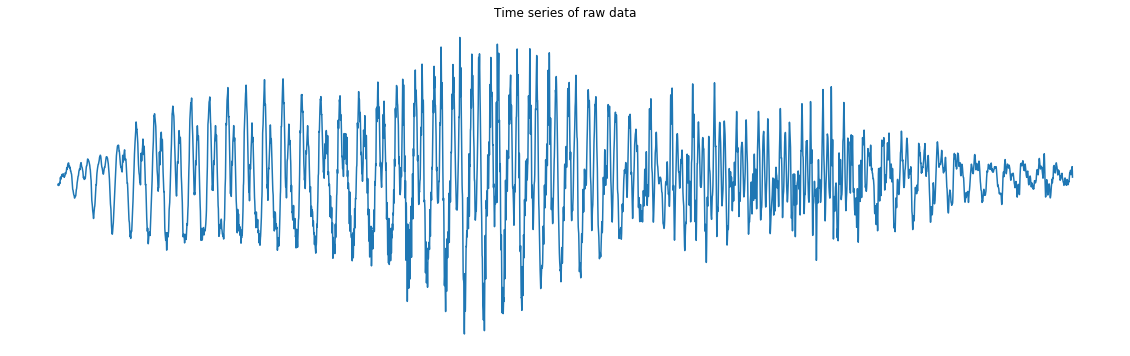

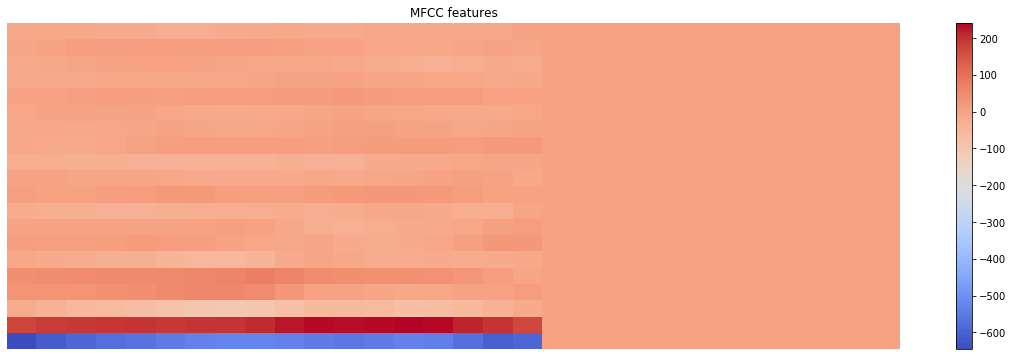

Shape of MFCC features after flattening: (600,)


In [5]:
plot_raw_mfcc(train_ls[10], utterance_length=cfg.UTTERANCE_LENGTH)

### 3) Extract MFCC features and labels (one-hot) on train/valid/test set

In [6]:
# training set
print('Extracting on training set...')
train_mfcc, train_label = extract_all_mfcc_features_and_labels(train_ls, cfg.UTTERANCE_LENGTH)

# validation set
print('Extracting on validation set...')
valid_mfcc, valid_label = extract_all_mfcc_features_and_labels(valid_ls, cfg.UTTERANCE_LENGTH)

# test set
print('Extracting on test set...')
test_mfcc, test_label = extract_all_mfcc_features_and_labels(test_ls, cfg.UTTERANCE_LENGTH)

Extracting on training set...
Shape of all_mfcc_features: (1400, 600)
Shape of all_labels: (1400, 10)
Extracting on validation set...
Shape of all_mfcc_features: (200, 600)
Shape of all_labels: (200, 10)
Extracting on test set...
Shape of all_mfcc_features: (400, 600)
Shape of all_labels: (400, 10)


# 2. Build, compile and train the deep model

## Here we implement the following functions:
* [build_model](): Build the deep model given input shape (data), hidden sizes and # of classes
* [compile_model](): Compile model in order to train it later
* [train_model](): Train the model
* [visualize_history](): Visualize the training history

In [7]:
from Network import build_model, compile_model, train_model, visualize_history

## Test above functions
### 1) Build the model

In [8]:
model = build_model(input_shape=train_mfcc.shape, hidden_sizes=[400, 400], num_classes=cfg.NUM_CLASSES)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0 (Dense)       (None, 400)               240400    
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 400)               160400    
_________________________________________________________________
output_layer (Dense)         (None, 10)                4010      
Total params: 404,810
Trainable params: 404,810
Non-trainable params: 0
_________________________________________________________________
None


### 2) Compile the model

In [9]:
model = compile_model(model, lr=cfg.LR*0.001)

In [10]:
print(cfg.LR*0.1)

0.0001


### 3) Train the model

In [11]:
model, history = train_model(model, train_mfcc, train_label, valid_mfcc, valid_label, epochs=10000,
model_save_path=cfg.MODEL_SAVE_PATH, 
patience=cfg.PATIENCE)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1400 samples, validate on 200 samples
Epoch 1/10000
 - 1s - loss: 2.7163 - categorical_accuracy: 0.0707 - val_loss: 2.6395 - val_categorical_accuracy: 0.1000
Epoch 2/10000
 - 0s - loss: 2.6994 - categorical_accuracy: 0.0707 - val_loss: 2.6256 - val_categorical_accuracy: 0.1000
Epoch 3/10000
 - 0s - loss: 2.6831 - categorical_accuracy: 0.0714 - val_loss: 2.6117 - val_categorical_accuracy: 0.1000
Epoch 4/10000
 - 0s - loss: 2.6671 - categorical_accuracy: 0.0736 - val_loss: 2.5979 - val_categorical_accuracy: 0.1000
Epoch 5/10000
 - 0s - loss: 2.6516 - categorical_accuracy: 0.0736 - val_loss: 2.5848 - val_categorical_accuracy: 0.1050
Epoch 6/10000
 - 0s - loss: 2.6365 - categorical_accuracy: 0.0764 - val_loss: 2.5725 - val_categorical_accuracy: 0.1100
Epoch 7/10000
 - 0s - loss: 2.6218 - categorical_accuracy: 0.0771 - val_loss: 2.5599 - val_categorical_accuracy: 0.1100
Epoch 8/10000
 - 

Epoch 63/10000
 - 0s - loss: 2.2569 - categorical_accuracy: 0.1864 - val_loss: 2.2615 - val_categorical_accuracy: 0.1950
Epoch 64/10000
 - 0s - loss: 2.2548 - categorical_accuracy: 0.1886 - val_loss: 2.2601 - val_categorical_accuracy: 0.1950
Epoch 65/10000
 - 0s - loss: 2.2527 - categorical_accuracy: 0.1900 - val_loss: 2.2585 - val_categorical_accuracy: 0.1850
Epoch 66/10000
 - 0s - loss: 2.2507 - categorical_accuracy: 0.1900 - val_loss: 2.2571 - val_categorical_accuracy: 0.1950
Epoch 67/10000
 - 0s - loss: 2.2488 - categorical_accuracy: 0.1929 - val_loss: 2.2558 - val_categorical_accuracy: 0.1900
Epoch 68/10000
 - 0s - loss: 2.2469 - categorical_accuracy: 0.1943 - val_loss: 2.2543 - val_categorical_accuracy: 0.1900
Epoch 69/10000
 - 0s - loss: 2.2450 - categorical_accuracy: 0.1957 - val_loss: 2.2531 - val_categorical_accuracy: 0.1900
Epoch 70/10000
 - 0s - loss: 2.2432 - categorical_accuracy: 0.1971 - val_loss: 2.2516 - val_categorical_accuracy: 0.1900
Epoch 71/10000
 - 0s - loss: 2.2

Epoch 131/10000
 - 0s - loss: 2.1672 - categorical_accuracy: 0.3636 - val_loss: 2.1915 - val_categorical_accuracy: 0.3050
Epoch 132/10000
 - 0s - loss: 2.1661 - categorical_accuracy: 0.3650 - val_loss: 2.1907 - val_categorical_accuracy: 0.3000
Epoch 133/10000
 - 0s - loss: 2.1650 - categorical_accuracy: 0.3657 - val_loss: 2.1897 - val_categorical_accuracy: 0.3050
Epoch 134/10000
 - 0s - loss: 2.1640 - categorical_accuracy: 0.3707 - val_loss: 2.1889 - val_categorical_accuracy: 0.3050
Epoch 135/10000
 - 0s - loss: 2.1630 - categorical_accuracy: 0.3736 - val_loss: 2.1879 - val_categorical_accuracy: 0.3100
Epoch 136/10000
 - 0s - loss: 2.1619 - categorical_accuracy: 0.3750 - val_loss: 2.1870 - val_categorical_accuracy: 0.3150
Epoch 137/10000
 - 0s - loss: 2.1609 - categorical_accuracy: 0.3736 - val_loss: 2.1861 - val_categorical_accuracy: 0.3100
Epoch 138/10000
 - 0s - loss: 2.1598 - categorical_accuracy: 0.3771 - val_loss: 2.1851 - val_categorical_accuracy: 0.3150
Epoch 139/10000
 - 0s - 

Epoch 199/10000
 - 0s - loss: 2.0970 - categorical_accuracy: 0.4514 - val_loss: 2.1272 - val_categorical_accuracy: 0.4050
Epoch 200/10000
 - 0s - loss: 2.0960 - categorical_accuracy: 0.4564 - val_loss: 2.1263 - val_categorical_accuracy: 0.4000
Epoch 201/10000
 - 0s - loss: 2.0949 - categorical_accuracy: 0.4593 - val_loss: 2.1253 - val_categorical_accuracy: 0.4000
Epoch 202/10000
 - 0s - loss: 2.0940 - categorical_accuracy: 0.4600 - val_loss: 2.1244 - val_categorical_accuracy: 0.4050
Epoch 203/10000
 - 0s - loss: 2.0929 - categorical_accuracy: 0.4600 - val_loss: 2.1235 - val_categorical_accuracy: 0.3950
Epoch 204/10000
 - 0s - loss: 2.0919 - categorical_accuracy: 0.4621 - val_loss: 2.1226 - val_categorical_accuracy: 0.4000
Epoch 205/10000
 - 0s - loss: 2.0909 - categorical_accuracy: 0.4607 - val_loss: 2.1219 - val_categorical_accuracy: 0.4050
Epoch 206/10000
 - 0s - loss: 2.0899 - categorical_accuracy: 0.4614 - val_loss: 2.1208 - val_categorical_accuracy: 0.4000
Epoch 207/10000
 - 0s - 

Epoch 267/10000
 - 0s - loss: 2.0269 - categorical_accuracy: 0.5229 - val_loss: 2.0664 - val_categorical_accuracy: 0.4200
Epoch 268/10000
 - 0s - loss: 2.0259 - categorical_accuracy: 0.5264 - val_loss: 2.0654 - val_categorical_accuracy: 0.4250
Epoch 269/10000
 - 0s - loss: 2.0248 - categorical_accuracy: 0.5264 - val_loss: 2.0646 - val_categorical_accuracy: 0.4200
Epoch 270/10000
 - 0s - loss: 2.0237 - categorical_accuracy: 0.5264 - val_loss: 2.0638 - val_categorical_accuracy: 0.4200
Epoch 271/10000
 - 0s - loss: 2.0227 - categorical_accuracy: 0.5257 - val_loss: 2.0627 - val_categorical_accuracy: 0.4200
Epoch 272/10000
 - 0s - loss: 2.0217 - categorical_accuracy: 0.5279 - val_loss: 2.0617 - val_categorical_accuracy: 0.4200
Epoch 273/10000
 - 0s - loss: 2.0206 - categorical_accuracy: 0.5271 - val_loss: 2.0609 - val_categorical_accuracy: 0.4200
Epoch 274/10000
 - 0s - loss: 2.0195 - categorical_accuracy: 0.5243 - val_loss: 2.0600 - val_categorical_accuracy: 0.4200
Epoch 275/10000
 - 0s - 

Epoch 335/10000
 - 0s - loss: 1.9551 - categorical_accuracy: 0.5693 - val_loss: 2.0017 - val_categorical_accuracy: 0.4550
Epoch 336/10000
 - 0s - loss: 1.9540 - categorical_accuracy: 0.5693 - val_loss: 2.0008 - val_categorical_accuracy: 0.4550
Epoch 337/10000
 - 0s - loss: 1.9530 - categorical_accuracy: 0.5721 - val_loss: 1.9999 - val_categorical_accuracy: 0.4550
Epoch 338/10000
 - 0s - loss: 1.9519 - categorical_accuracy: 0.5736 - val_loss: 1.9990 - val_categorical_accuracy: 0.4550
Epoch 339/10000
 - 0s - loss: 1.9509 - categorical_accuracy: 0.5721 - val_loss: 1.9980 - val_categorical_accuracy: 0.4600
Epoch 340/10000
 - 0s - loss: 1.9499 - categorical_accuracy: 0.5700 - val_loss: 1.9969 - val_categorical_accuracy: 0.4600
Epoch 341/10000
 - 0s - loss: 1.9488 - categorical_accuracy: 0.5714 - val_loss: 1.9962 - val_categorical_accuracy: 0.4600
Epoch 342/10000
 - 0s - loss: 1.9478 - categorical_accuracy: 0.5743 - val_loss: 1.9950 - val_categorical_accuracy: 0.4600
Epoch 343/10000
 - 0s - 

Epoch 403/10000
 - 0s - loss: 1.8826 - categorical_accuracy: 0.5964 - val_loss: 1.9370 - val_categorical_accuracy: 0.5050
Epoch 404/10000
 - 0s - loss: 1.8815 - categorical_accuracy: 0.5979 - val_loss: 1.9360 - val_categorical_accuracy: 0.5050
Epoch 405/10000
 - 0s - loss: 1.8805 - categorical_accuracy: 0.5979 - val_loss: 1.9350 - val_categorical_accuracy: 0.5050
Epoch 406/10000
 - 0s - loss: 1.8794 - categorical_accuracy: 0.5979 - val_loss: 1.9340 - val_categorical_accuracy: 0.5050
Epoch 407/10000
 - 0s - loss: 1.8783 - categorical_accuracy: 0.5971 - val_loss: 1.9330 - val_categorical_accuracy: 0.5050
Epoch 408/10000
 - 0s - loss: 1.8773 - categorical_accuracy: 0.5979 - val_loss: 1.9320 - val_categorical_accuracy: 0.5050
Epoch 409/10000
 - 0s - loss: 1.8762 - categorical_accuracy: 0.6007 - val_loss: 1.9311 - val_categorical_accuracy: 0.5050
Epoch 410/10000
 - 0s - loss: 1.8751 - categorical_accuracy: 0.6014 - val_loss: 1.9300 - val_categorical_accuracy: 0.5100
Epoch 411/10000
 - 0s - 

Epoch 471/10000
 - 0s - loss: 1.8096 - categorical_accuracy: 0.6143 - val_loss: 1.8735 - val_categorical_accuracy: 0.5200
Epoch 472/10000
 - 0s - loss: 1.8085 - categorical_accuracy: 0.6129 - val_loss: 1.8725 - val_categorical_accuracy: 0.5250
Epoch 473/10000
 - 0s - loss: 1.8075 - categorical_accuracy: 0.6114 - val_loss: 1.8714 - val_categorical_accuracy: 0.5250
Epoch 474/10000
 - 0s - loss: 1.8065 - categorical_accuracy: 0.6157 - val_loss: 1.8706 - val_categorical_accuracy: 0.5250
Epoch 475/10000
 - 0s - loss: 1.8054 - categorical_accuracy: 0.6143 - val_loss: 1.8698 - val_categorical_accuracy: 0.5250
Epoch 476/10000
 - 0s - loss: 1.8043 - categorical_accuracy: 0.6164 - val_loss: 1.8689 - val_categorical_accuracy: 0.5250
Epoch 477/10000
 - 0s - loss: 1.8032 - categorical_accuracy: 0.6186 - val_loss: 1.8678 - val_categorical_accuracy: 0.5250
Epoch 478/10000
 - 0s - loss: 1.8021 - categorical_accuracy: 0.6171 - val_loss: 1.8670 - val_categorical_accuracy: 0.5250
Epoch 479/10000
 - 0s - 

Epoch 539/10000
 - 0s - loss: 1.7363 - categorical_accuracy: 0.6471 - val_loss: 1.8096 - val_categorical_accuracy: 0.5450
Epoch 540/10000
 - 0s - loss: 1.7352 - categorical_accuracy: 0.6514 - val_loss: 1.8086 - val_categorical_accuracy: 0.5450
Epoch 541/10000
 - 0s - loss: 1.7341 - categorical_accuracy: 0.6500 - val_loss: 1.8078 - val_categorical_accuracy: 0.5450
Epoch 542/10000
 - 0s - loss: 1.7331 - categorical_accuracy: 0.6514 - val_loss: 1.8068 - val_categorical_accuracy: 0.5450
Epoch 543/10000
 - 0s - loss: 1.7320 - categorical_accuracy: 0.6514 - val_loss: 1.8059 - val_categorical_accuracy: 0.5450
Epoch 544/10000
 - 0s - loss: 1.7309 - categorical_accuracy: 0.6521 - val_loss: 1.8050 - val_categorical_accuracy: 0.5450
Epoch 545/10000
 - 0s - loss: 1.7298 - categorical_accuracy: 0.6507 - val_loss: 1.8040 - val_categorical_accuracy: 0.5500
Epoch 546/10000
 - 0s - loss: 1.7287 - categorical_accuracy: 0.6543 - val_loss: 1.8031 - val_categorical_accuracy: 0.5500
Epoch 547/10000
 - 0s - 

Epoch 607/10000
 - 0s - loss: 1.6616 - categorical_accuracy: 0.6786 - val_loss: 1.7446 - val_categorical_accuracy: 0.5500
Epoch 608/10000
 - 0s - loss: 1.6605 - categorical_accuracy: 0.6779 - val_loss: 1.7437 - val_categorical_accuracy: 0.5500
Epoch 609/10000
 - 0s - loss: 1.6595 - categorical_accuracy: 0.6771 - val_loss: 1.7427 - val_categorical_accuracy: 0.5550
Epoch 610/10000
 - 0s - loss: 1.6582 - categorical_accuracy: 0.6779 - val_loss: 1.7415 - val_categorical_accuracy: 0.5500
Epoch 611/10000
 - 0s - loss: 1.6571 - categorical_accuracy: 0.6814 - val_loss: 1.7407 - val_categorical_accuracy: 0.5500
Epoch 612/10000
 - 0s - loss: 1.6560 - categorical_accuracy: 0.6779 - val_loss: 1.7396 - val_categorical_accuracy: 0.5500
Epoch 613/10000
 - 0s - loss: 1.6548 - categorical_accuracy: 0.6800 - val_loss: 1.7385 - val_categorical_accuracy: 0.5500
Epoch 614/10000
 - 0s - loss: 1.6537 - categorical_accuracy: 0.6814 - val_loss: 1.7375 - val_categorical_accuracy: 0.5500
Epoch 615/10000
 - 0s - 

Epoch 675/10000
 - 0s - loss: 1.5847 - categorical_accuracy: 0.7050 - val_loss: 1.6763 - val_categorical_accuracy: 0.5750
Epoch 676/10000
 - 0s - loss: 1.5836 - categorical_accuracy: 0.7057 - val_loss: 1.6751 - val_categorical_accuracy: 0.5750
Epoch 677/10000
 - 0s - loss: 1.5824 - categorical_accuracy: 0.7050 - val_loss: 1.6743 - val_categorical_accuracy: 0.5750
Epoch 678/10000
 - 0s - loss: 1.5813 - categorical_accuracy: 0.7071 - val_loss: 1.6734 - val_categorical_accuracy: 0.5750
Epoch 679/10000
 - 0s - loss: 1.5802 - categorical_accuracy: 0.7057 - val_loss: 1.6723 - val_categorical_accuracy: 0.5750
Epoch 680/10000
 - 0s - loss: 1.5791 - categorical_accuracy: 0.7050 - val_loss: 1.6713 - val_categorical_accuracy: 0.5750
Epoch 681/10000
 - 0s - loss: 1.5780 - categorical_accuracy: 0.7079 - val_loss: 1.6702 - val_categorical_accuracy: 0.5750
Epoch 682/10000
 - 0s - loss: 1.5768 - categorical_accuracy: 0.7071 - val_loss: 1.6691 - val_categorical_accuracy: 0.5750
Epoch 683/10000
 - 0s - 

Epoch 743/10000
 - 0s - loss: 1.5086 - categorical_accuracy: 0.7307 - val_loss: 1.6107 - val_categorical_accuracy: 0.5800
Epoch 744/10000
 - 0s - loss: 1.5075 - categorical_accuracy: 0.7314 - val_loss: 1.6099 - val_categorical_accuracy: 0.5750
Epoch 745/10000
 - 0s - loss: 1.5064 - categorical_accuracy: 0.7314 - val_loss: 1.6089 - val_categorical_accuracy: 0.5750
Epoch 746/10000
 - 0s - loss: 1.5052 - categorical_accuracy: 0.7314 - val_loss: 1.6079 - val_categorical_accuracy: 0.5750
Epoch 747/10000
 - 0s - loss: 1.5041 - categorical_accuracy: 0.7321 - val_loss: 1.6070 - val_categorical_accuracy: 0.5750
Epoch 748/10000
 - 0s - loss: 1.5030 - categorical_accuracy: 0.7321 - val_loss: 1.6058 - val_categorical_accuracy: 0.5850
Epoch 749/10000
 - 0s - loss: 1.5019 - categorical_accuracy: 0.7336 - val_loss: 1.6051 - val_categorical_accuracy: 0.5750
Epoch 750/10000
 - 0s - loss: 1.5007 - categorical_accuracy: 0.7321 - val_loss: 1.6041 - val_categorical_accuracy: 0.5850
Epoch 751/10000
 - 0s - 

Epoch 811/10000
 - 0s - loss: 1.4322 - categorical_accuracy: 0.7593 - val_loss: 1.5456 - val_categorical_accuracy: 0.6050
Epoch 812/10000
 - 0s - loss: 1.4311 - categorical_accuracy: 0.7600 - val_loss: 1.5445 - val_categorical_accuracy: 0.6100
Epoch 813/10000
 - 0s - loss: 1.4300 - categorical_accuracy: 0.7586 - val_loss: 1.5436 - val_categorical_accuracy: 0.6150
Epoch 814/10000
 - 0s - loss: 1.4289 - categorical_accuracy: 0.7593 - val_loss: 1.5425 - val_categorical_accuracy: 0.6100
Epoch 815/10000
 - 0s - loss: 1.4279 - categorical_accuracy: 0.7600 - val_loss: 1.5415 - val_categorical_accuracy: 0.6150
Epoch 816/10000
 - 0s - loss: 1.4267 - categorical_accuracy: 0.7593 - val_loss: 1.5407 - val_categorical_accuracy: 0.6100
Epoch 817/10000
 - 0s - loss: 1.4256 - categorical_accuracy: 0.7607 - val_loss: 1.5398 - val_categorical_accuracy: 0.6150
Epoch 818/10000
 - 0s - loss: 1.4245 - categorical_accuracy: 0.7600 - val_loss: 1.5388 - val_categorical_accuracy: 0.6100
Epoch 819/10000
 - 0s - 

Epoch 879/10000
 - 0s - loss: 1.3579 - categorical_accuracy: 0.7779 - val_loss: 1.4802 - val_categorical_accuracy: 0.6400
Epoch 880/10000
 - 0s - loss: 1.3569 - categorical_accuracy: 0.7771 - val_loss: 1.4793 - val_categorical_accuracy: 0.6450
Epoch 881/10000
 - 0s - loss: 1.3558 - categorical_accuracy: 0.7786 - val_loss: 1.4785 - val_categorical_accuracy: 0.6400
Epoch 882/10000
 - 0s - loss: 1.3547 - categorical_accuracy: 0.7771 - val_loss: 1.4774 - val_categorical_accuracy: 0.6450
Epoch 883/10000
 - 0s - loss: 1.3536 - categorical_accuracy: 0.7771 - val_loss: 1.4764 - val_categorical_accuracy: 0.6450
Epoch 884/10000
 - 0s - loss: 1.3525 - categorical_accuracy: 0.7786 - val_loss: 1.4754 - val_categorical_accuracy: 0.6450
Epoch 885/10000
 - 0s - loss: 1.3514 - categorical_accuracy: 0.7771 - val_loss: 1.4743 - val_categorical_accuracy: 0.6450
Epoch 886/10000
 - 0s - loss: 1.3503 - categorical_accuracy: 0.7786 - val_loss: 1.4735 - val_categorical_accuracy: 0.6450
Epoch 887/10000
 - 0s - 

Epoch 947/10000
 - 0s - loss: 1.2851 - categorical_accuracy: 0.7936 - val_loss: 1.4152 - val_categorical_accuracy: 0.6600
Epoch 948/10000
 - 0s - loss: 1.2840 - categorical_accuracy: 0.7929 - val_loss: 1.4141 - val_categorical_accuracy: 0.6600
Epoch 949/10000
 - 0s - loss: 1.2830 - categorical_accuracy: 0.7936 - val_loss: 1.4131 - val_categorical_accuracy: 0.6600
Epoch 950/10000
 - 0s - loss: 1.2819 - categorical_accuracy: 0.7929 - val_loss: 1.4122 - val_categorical_accuracy: 0.6600
Epoch 951/10000
 - 0s - loss: 1.2809 - categorical_accuracy: 0.7943 - val_loss: 1.4114 - val_categorical_accuracy: 0.6600
Epoch 952/10000
 - 0s - loss: 1.2799 - categorical_accuracy: 0.7929 - val_loss: 1.4104 - val_categorical_accuracy: 0.6600
Epoch 953/10000
 - 0s - loss: 1.2788 - categorical_accuracy: 0.7936 - val_loss: 1.4094 - val_categorical_accuracy: 0.6600
Epoch 954/10000
 - 0s - loss: 1.2778 - categorical_accuracy: 0.7950 - val_loss: 1.4084 - val_categorical_accuracy: 0.6600
Epoch 955/10000
 - 0s - 

 - 0s - loss: 1.2159 - categorical_accuracy: 0.8114 - val_loss: 1.3536 - val_categorical_accuracy: 0.6700
Epoch 1015/10000
 - 0s - loss: 1.2149 - categorical_accuracy: 0.8121 - val_loss: 1.3527 - val_categorical_accuracy: 0.6700
Epoch 1016/10000
 - 0s - loss: 1.2139 - categorical_accuracy: 0.8129 - val_loss: 1.3518 - val_categorical_accuracy: 0.6700
Epoch 1017/10000
 - 0s - loss: 1.2129 - categorical_accuracy: 0.8121 - val_loss: 1.3510 - val_categorical_accuracy: 0.6700
Epoch 1018/10000
 - 0s - loss: 1.2119 - categorical_accuracy: 0.8136 - val_loss: 1.3500 - val_categorical_accuracy: 0.6700
Epoch 1019/10000
 - 0s - loss: 1.2109 - categorical_accuracy: 0.8129 - val_loss: 1.3494 - val_categorical_accuracy: 0.6700
Epoch 1020/10000
 - 0s - loss: 1.2099 - categorical_accuracy: 0.8121 - val_loss: 1.3485 - val_categorical_accuracy: 0.6700
Epoch 1021/10000
 - 0s - loss: 1.2089 - categorical_accuracy: 0.8143 - val_loss: 1.3473 - val_categorical_accuracy: 0.6700
Epoch 1022/10000
 - 0s - loss: 1.

Epoch 1081/10000
 - 0s - loss: 1.1478 - categorical_accuracy: 0.8300 - val_loss: 1.2921 - val_categorical_accuracy: 0.6750
Epoch 1082/10000
 - 0s - loss: 1.1467 - categorical_accuracy: 0.8300 - val_loss: 1.2912 - val_categorical_accuracy: 0.6750
Epoch 1083/10000
 - 0s - loss: 1.1457 - categorical_accuracy: 0.8307 - val_loss: 1.2901 - val_categorical_accuracy: 0.6750
Epoch 1084/10000
 - 0s - loss: 1.1447 - categorical_accuracy: 0.8300 - val_loss: 1.2892 - val_categorical_accuracy: 0.6750
Epoch 1085/10000
 - 0s - loss: 1.1437 - categorical_accuracy: 0.8300 - val_loss: 1.2884 - val_categorical_accuracy: 0.6750
Epoch 1086/10000
 - 0s - loss: 1.1427 - categorical_accuracy: 0.8300 - val_loss: 1.2874 - val_categorical_accuracy: 0.6750
Epoch 1087/10000
 - 0s - loss: 1.1417 - categorical_accuracy: 0.8300 - val_loss: 1.2864 - val_categorical_accuracy: 0.6750
Epoch 1088/10000
 - 0s - loss: 1.1407 - categorical_accuracy: 0.8300 - val_loss: 1.2856 - val_categorical_accuracy: 0.6750
Epoch 1089/10000

Epoch 1148/10000
 - 0s - loss: 1.0827 - categorical_accuracy: 0.8429 - val_loss: 1.2314 - val_categorical_accuracy: 0.7000
Epoch 1149/10000
 - 0s - loss: 1.0818 - categorical_accuracy: 0.8421 - val_loss: 1.2308 - val_categorical_accuracy: 0.7000
Epoch 1150/10000
 - 0s - loss: 1.0808 - categorical_accuracy: 0.8429 - val_loss: 1.2298 - val_categorical_accuracy: 0.7050
Epoch 1151/10000
 - 0s - loss: 1.0799 - categorical_accuracy: 0.8429 - val_loss: 1.2290 - val_categorical_accuracy: 0.7050
Epoch 1152/10000
 - 0s - loss: 1.0790 - categorical_accuracy: 0.8429 - val_loss: 1.2282 - val_categorical_accuracy: 0.7050
Epoch 1153/10000
 - 0s - loss: 1.0780 - categorical_accuracy: 0.8429 - val_loss: 1.2273 - val_categorical_accuracy: 0.7050
Epoch 1154/10000
 - 0s - loss: 1.0771 - categorical_accuracy: 0.8429 - val_loss: 1.2265 - val_categorical_accuracy: 0.7050
Epoch 1155/10000
 - 0s - loss: 1.0762 - categorical_accuracy: 0.8436 - val_loss: 1.2256 - val_categorical_accuracy: 0.7050
Epoch 1156/10000

Epoch 1215/10000
 - 0s - loss: 1.0209 - categorical_accuracy: 0.8579 - val_loss: 1.1743 - val_categorical_accuracy: 0.7200
Epoch 1216/10000
 - 0s - loss: 1.0200 - categorical_accuracy: 0.8586 - val_loss: 1.1736 - val_categorical_accuracy: 0.7200
Epoch 1217/10000
 - 0s - loss: 1.0191 - categorical_accuracy: 0.8600 - val_loss: 1.1728 - val_categorical_accuracy: 0.7200
Epoch 1218/10000
 - 0s - loss: 1.0182 - categorical_accuracy: 0.8593 - val_loss: 1.1718 - val_categorical_accuracy: 0.7200
Epoch 1219/10000
 - 0s - loss: 1.0173 - categorical_accuracy: 0.8600 - val_loss: 1.1710 - val_categorical_accuracy: 0.7200
Epoch 1220/10000
 - 0s - loss: 1.0164 - categorical_accuracy: 0.8600 - val_loss: 1.1702 - val_categorical_accuracy: 0.7200
Epoch 1221/10000
 - 0s - loss: 1.0155 - categorical_accuracy: 0.8607 - val_loss: 1.1695 - val_categorical_accuracy: 0.7250
Epoch 1222/10000
 - 0s - loss: 1.0146 - categorical_accuracy: 0.8600 - val_loss: 1.1685 - val_categorical_accuracy: 0.7200
Epoch 1223/10000

Epoch 1282/10000
 - 0s - loss: 0.9615 - categorical_accuracy: 0.8650 - val_loss: 1.1198 - val_categorical_accuracy: 0.7300
Epoch 1283/10000
 - 0s - loss: 0.9606 - categorical_accuracy: 0.8657 - val_loss: 1.1191 - val_categorical_accuracy: 0.7300
Epoch 1284/10000
 - 0s - loss: 0.9597 - categorical_accuracy: 0.8664 - val_loss: 1.1181 - val_categorical_accuracy: 0.7300
Epoch 1285/10000
 - 0s - loss: 0.9589 - categorical_accuracy: 0.8664 - val_loss: 1.1173 - val_categorical_accuracy: 0.7300
Epoch 1286/10000
 - 0s - loss: 0.9580 - categorical_accuracy: 0.8664 - val_loss: 1.1166 - val_categorical_accuracy: 0.7300
Epoch 1287/10000
 - 0s - loss: 0.9571 - categorical_accuracy: 0.8650 - val_loss: 1.1156 - val_categorical_accuracy: 0.7300
Epoch 1288/10000
 - 0s - loss: 0.9562 - categorical_accuracy: 0.8664 - val_loss: 1.1150 - val_categorical_accuracy: 0.7300
Epoch 1289/10000
 - 0s - loss: 0.9554 - categorical_accuracy: 0.8664 - val_loss: 1.1141 - val_categorical_accuracy: 0.7300
Epoch 1290/10000

Epoch 1349/10000
 - 0s - loss: 0.9048 - categorical_accuracy: 0.8757 - val_loss: 1.0653 - val_categorical_accuracy: 0.7350
Epoch 1350/10000
 - 0s - loss: 0.9040 - categorical_accuracy: 0.8764 - val_loss: 1.0644 - val_categorical_accuracy: 0.7400
Epoch 1351/10000
 - 0s - loss: 0.9031 - categorical_accuracy: 0.8757 - val_loss: 1.0636 - val_categorical_accuracy: 0.7400
Epoch 1352/10000
 - 0s - loss: 0.9023 - categorical_accuracy: 0.8764 - val_loss: 1.0627 - val_categorical_accuracy: 0.7400
Epoch 1353/10000
 - 0s - loss: 0.9015 - categorical_accuracy: 0.8743 - val_loss: 1.0619 - val_categorical_accuracy: 0.7450
Epoch 1354/10000
 - 0s - loss: 0.9006 - categorical_accuracy: 0.8757 - val_loss: 1.0610 - val_categorical_accuracy: 0.7450
Epoch 1355/10000
 - 0s - loss: 0.8998 - categorical_accuracy: 0.8764 - val_loss: 1.0603 - val_categorical_accuracy: 0.7450
Epoch 1356/10000
 - 0s - loss: 0.8990 - categorical_accuracy: 0.8771 - val_loss: 1.0594 - val_categorical_accuracy: 0.7450
Epoch 1357/10000

Epoch 1416/10000
 - 0s - loss: 0.8497 - categorical_accuracy: 0.8829 - val_loss: 1.0137 - val_categorical_accuracy: 0.7450
Epoch 1417/10000
 - 0s - loss: 0.8489 - categorical_accuracy: 0.8829 - val_loss: 1.0131 - val_categorical_accuracy: 0.7500
Epoch 1418/10000
 - 0s - loss: 0.8482 - categorical_accuracy: 0.8836 - val_loss: 1.0122 - val_categorical_accuracy: 0.7500
Epoch 1419/10000
 - 0s - loss: 0.8474 - categorical_accuracy: 0.8843 - val_loss: 1.0115 - val_categorical_accuracy: 0.7500
Epoch 1420/10000
 - 0s - loss: 0.8466 - categorical_accuracy: 0.8843 - val_loss: 1.0108 - val_categorical_accuracy: 0.7500
Epoch 1421/10000
 - 0s - loss: 0.8458 - categorical_accuracy: 0.8843 - val_loss: 1.0100 - val_categorical_accuracy: 0.7500
Epoch 1422/10000
 - 0s - loss: 0.8450 - categorical_accuracy: 0.8843 - val_loss: 1.0093 - val_categorical_accuracy: 0.7550
Epoch 1423/10000
 - 0s - loss: 0.8442 - categorical_accuracy: 0.8843 - val_loss: 1.0087 - val_categorical_accuracy: 0.7500
Epoch 1424/10000

Epoch 1483/10000
 - 0s - loss: 0.7984 - categorical_accuracy: 0.8950 - val_loss: 0.9655 - val_categorical_accuracy: 0.7650
Epoch 1484/10000
 - 0s - loss: 0.7976 - categorical_accuracy: 0.8943 - val_loss: 0.9648 - val_categorical_accuracy: 0.7650
Epoch 1485/10000
 - 0s - loss: 0.7969 - categorical_accuracy: 0.8943 - val_loss: 0.9641 - val_categorical_accuracy: 0.7650
Epoch 1486/10000
 - 0s - loss: 0.7962 - categorical_accuracy: 0.8943 - val_loss: 0.9634 - val_categorical_accuracy: 0.7650
Epoch 1487/10000
 - 0s - loss: 0.7954 - categorical_accuracy: 0.8957 - val_loss: 0.9628 - val_categorical_accuracy: 0.7650
Epoch 1488/10000
 - 0s - loss: 0.7946 - categorical_accuracy: 0.8943 - val_loss: 0.9621 - val_categorical_accuracy: 0.7650
Epoch 1489/10000
 - 0s - loss: 0.7939 - categorical_accuracy: 0.8943 - val_loss: 0.9613 - val_categorical_accuracy: 0.7650
Epoch 1490/10000
 - 0s - loss: 0.7932 - categorical_accuracy: 0.8943 - val_loss: 0.9605 - val_categorical_accuracy: 0.7650
Epoch 1491/10000

Epoch 1550/10000
 - 0s - loss: 0.7494 - categorical_accuracy: 0.9000 - val_loss: 0.9155 - val_categorical_accuracy: 0.7900
Epoch 1551/10000
 - 0s - loss: 0.7487 - categorical_accuracy: 0.8993 - val_loss: 0.9150 - val_categorical_accuracy: 0.7900
Epoch 1552/10000
 - 0s - loss: 0.7480 - categorical_accuracy: 0.9000 - val_loss: 0.9142 - val_categorical_accuracy: 0.7900
Epoch 1553/10000
 - 0s - loss: 0.7472 - categorical_accuracy: 0.9000 - val_loss: 0.9136 - val_categorical_accuracy: 0.7900
Epoch 1554/10000
 - 0s - loss: 0.7466 - categorical_accuracy: 0.9000 - val_loss: 0.9129 - val_categorical_accuracy: 0.7900
Epoch 1555/10000
 - 0s - loss: 0.7458 - categorical_accuracy: 0.9007 - val_loss: 0.9122 - val_categorical_accuracy: 0.7900
Epoch 1556/10000
 - 0s - loss: 0.7451 - categorical_accuracy: 0.9014 - val_loss: 0.9113 - val_categorical_accuracy: 0.7900
Epoch 1557/10000
 - 1s - loss: 0.7444 - categorical_accuracy: 0.9014 - val_loss: 0.9107 - val_categorical_accuracy: 0.7900
Epoch 1558/10000

Epoch 1617/10000
 - 0s - loss: 0.7029 - categorical_accuracy: 0.9100 - val_loss: 0.8701 - val_categorical_accuracy: 0.8000
Epoch 1618/10000
 - 0s - loss: 0.7022 - categorical_accuracy: 0.9100 - val_loss: 0.8693 - val_categorical_accuracy: 0.8000
Epoch 1619/10000
 - 0s - loss: 0.7015 - categorical_accuracy: 0.9100 - val_loss: 0.8686 - val_categorical_accuracy: 0.8050
Epoch 1620/10000
 - 0s - loss: 0.7008 - categorical_accuracy: 0.9093 - val_loss: 0.8680 - val_categorical_accuracy: 0.8000
Epoch 1621/10000
 - 0s - loss: 0.7001 - categorical_accuracy: 0.9093 - val_loss: 0.8673 - val_categorical_accuracy: 0.8000
Epoch 1622/10000
 - 0s - loss: 0.6995 - categorical_accuracy: 0.9093 - val_loss: 0.8667 - val_categorical_accuracy: 0.8050
Epoch 1623/10000
 - 0s - loss: 0.6988 - categorical_accuracy: 0.9093 - val_loss: 0.8660 - val_categorical_accuracy: 0.8050
Epoch 1624/10000
 - 0s - loss: 0.6982 - categorical_accuracy: 0.9100 - val_loss: 0.8654 - val_categorical_accuracy: 0.8100
Epoch 1625/10000

Epoch 1684/10000
 - 0s - loss: 0.6590 - categorical_accuracy: 0.9150 - val_loss: 0.8263 - val_categorical_accuracy: 0.8150
Epoch 1685/10000
 - 0s - loss: 0.6583 - categorical_accuracy: 0.9150 - val_loss: 0.8257 - val_categorical_accuracy: 0.8150
Epoch 1686/10000
 - 0s - loss: 0.6577 - categorical_accuracy: 0.9150 - val_loss: 0.8251 - val_categorical_accuracy: 0.8150
Epoch 1687/10000
 - 0s - loss: 0.6571 - categorical_accuracy: 0.9150 - val_loss: 0.8245 - val_categorical_accuracy: 0.8150
Epoch 1688/10000
 - 0s - loss: 0.6564 - categorical_accuracy: 0.9150 - val_loss: 0.8239 - val_categorical_accuracy: 0.8150
Epoch 1689/10000
 - 0s - loss: 0.6558 - categorical_accuracy: 0.9150 - val_loss: 0.8232 - val_categorical_accuracy: 0.8150
Epoch 1690/10000
 - 0s - loss: 0.6552 - categorical_accuracy: 0.9150 - val_loss: 0.8226 - val_categorical_accuracy: 0.8150
Epoch 1691/10000
 - 0s - loss: 0.6545 - categorical_accuracy: 0.9150 - val_loss: 0.8220 - val_categorical_accuracy: 0.8150
Epoch 1692/10000

Epoch 1751/10000
 - 0s - loss: 0.6170 - categorical_accuracy: 0.9221 - val_loss: 0.7853 - val_categorical_accuracy: 0.8300
Epoch 1752/10000
 - 0s - loss: 0.6164 - categorical_accuracy: 0.9221 - val_loss: 0.7848 - val_categorical_accuracy: 0.8300
Epoch 1753/10000
 - 0s - loss: 0.6159 - categorical_accuracy: 0.9221 - val_loss: 0.7840 - val_categorical_accuracy: 0.8300
Epoch 1754/10000
 - 0s - loss: 0.6152 - categorical_accuracy: 0.9221 - val_loss: 0.7836 - val_categorical_accuracy: 0.8300
Epoch 1755/10000
 - 0s - loss: 0.6146 - categorical_accuracy: 0.9221 - val_loss: 0.7829 - val_categorical_accuracy: 0.8300
Epoch 1756/10000
 - 0s - loss: 0.6140 - categorical_accuracy: 0.9221 - val_loss: 0.7824 - val_categorical_accuracy: 0.8300
Epoch 1757/10000
 - 0s - loss: 0.6134 - categorical_accuracy: 0.9221 - val_loss: 0.7817 - val_categorical_accuracy: 0.8300
Epoch 1758/10000
 - 0s - loss: 0.6128 - categorical_accuracy: 0.9221 - val_loss: 0.7812 - val_categorical_accuracy: 0.8300
Epoch 1759/10000

Epoch 1818/10000
 - 0s - loss: 0.5770 - categorical_accuracy: 0.9279 - val_loss: 0.7458 - val_categorical_accuracy: 0.8350
Epoch 1819/10000
 - 0s - loss: 0.5764 - categorical_accuracy: 0.9279 - val_loss: 0.7452 - val_categorical_accuracy: 0.8350
Epoch 1820/10000
 - 0s - loss: 0.5758 - categorical_accuracy: 0.9279 - val_loss: 0.7446 - val_categorical_accuracy: 0.8350
Epoch 1821/10000
 - 0s - loss: 0.5753 - categorical_accuracy: 0.9279 - val_loss: 0.7441 - val_categorical_accuracy: 0.8350
Epoch 1822/10000
 - 0s - loss: 0.5747 - categorical_accuracy: 0.9279 - val_loss: 0.7434 - val_categorical_accuracy: 0.8350
Epoch 1823/10000
 - 0s - loss: 0.5741 - categorical_accuracy: 0.9279 - val_loss: 0.7429 - val_categorical_accuracy: 0.8350
Epoch 1824/10000
 - 0s - loss: 0.5736 - categorical_accuracy: 0.9279 - val_loss: 0.7424 - val_categorical_accuracy: 0.8350
Epoch 1825/10000
 - 0s - loss: 0.5730 - categorical_accuracy: 0.9279 - val_loss: 0.7417 - val_categorical_accuracy: 0.8350
Epoch 1826/10000

Epoch 1885/10000
 - 0s - loss: 0.5391 - categorical_accuracy: 0.9321 - val_loss: 0.7083 - val_categorical_accuracy: 0.8400
Epoch 1886/10000
 - 0s - loss: 0.5385 - categorical_accuracy: 0.9321 - val_loss: 0.7079 - val_categorical_accuracy: 0.8400
Epoch 1887/10000
 - 0s - loss: 0.5380 - categorical_accuracy: 0.9329 - val_loss: 0.7073 - val_categorical_accuracy: 0.8400
Epoch 1888/10000
 - 0s - loss: 0.5374 - categorical_accuracy: 0.9329 - val_loss: 0.7068 - val_categorical_accuracy: 0.8400
Epoch 1889/10000
 - 0s - loss: 0.5369 - categorical_accuracy: 0.9329 - val_loss: 0.7063 - val_categorical_accuracy: 0.8400
Epoch 1890/10000
 - 0s - loss: 0.5363 - categorical_accuracy: 0.9329 - val_loss: 0.7057 - val_categorical_accuracy: 0.8400
Epoch 1891/10000
 - 0s - loss: 0.5358 - categorical_accuracy: 0.9336 - val_loss: 0.7052 - val_categorical_accuracy: 0.8400
Epoch 1892/10000
 - 0s - loss: 0.5352 - categorical_accuracy: 0.9336 - val_loss: 0.7047 - val_categorical_accuracy: 0.8400
Epoch 1893/10000

Epoch 1952/10000
 - 1s - loss: 0.5035 - categorical_accuracy: 0.9400 - val_loss: 0.6738 - val_categorical_accuracy: 0.8550
Epoch 1953/10000
 - 0s - loss: 0.5030 - categorical_accuracy: 0.9393 - val_loss: 0.6733 - val_categorical_accuracy: 0.8550
Epoch 1954/10000
 - 0s - loss: 0.5025 - categorical_accuracy: 0.9393 - val_loss: 0.6727 - val_categorical_accuracy: 0.8550
Epoch 1955/10000
 - 0s - loss: 0.5019 - categorical_accuracy: 0.9393 - val_loss: 0.6723 - val_categorical_accuracy: 0.8550
Epoch 1956/10000
 - 0s - loss: 0.5015 - categorical_accuracy: 0.9393 - val_loss: 0.6717 - val_categorical_accuracy: 0.8550
Epoch 1957/10000
 - 0s - loss: 0.5009 - categorical_accuracy: 0.9393 - val_loss: 0.6713 - val_categorical_accuracy: 0.8550
Epoch 1958/10000
 - 0s - loss: 0.5004 - categorical_accuracy: 0.9393 - val_loss: 0.6707 - val_categorical_accuracy: 0.8550
Epoch 1959/10000
 - 0s - loss: 0.4999 - categorical_accuracy: 0.9407 - val_loss: 0.6703 - val_categorical_accuracy: 0.8550
Epoch 1960/10000

Epoch 2019/10000
 - 0s - loss: 0.4699 - categorical_accuracy: 0.9450 - val_loss: 0.6408 - val_categorical_accuracy: 0.8600
Epoch 2020/10000
 - 0s - loss: 0.4694 - categorical_accuracy: 0.9450 - val_loss: 0.6400 - val_categorical_accuracy: 0.8600
Epoch 2021/10000
 - 0s - loss: 0.4690 - categorical_accuracy: 0.9450 - val_loss: 0.6396 - val_categorical_accuracy: 0.8600
Epoch 2022/10000
 - 0s - loss: 0.4685 - categorical_accuracy: 0.9450 - val_loss: 0.6392 - val_categorical_accuracy: 0.8600
Epoch 2023/10000
 - 0s - loss: 0.4680 - categorical_accuracy: 0.9450 - val_loss: 0.6386 - val_categorical_accuracy: 0.8600
Epoch 2024/10000
 - 0s - loss: 0.4675 - categorical_accuracy: 0.9450 - val_loss: 0.6381 - val_categorical_accuracy: 0.8600
Epoch 2025/10000
 - 0s - loss: 0.4670 - categorical_accuracy: 0.9457 - val_loss: 0.6375 - val_categorical_accuracy: 0.8600
Epoch 2026/10000
 - 1s - loss: 0.4666 - categorical_accuracy: 0.9457 - val_loss: 0.6372 - val_categorical_accuracy: 0.8600
Epoch 2027/10000

Epoch 2086/10000
 - 0s - loss: 0.4385 - categorical_accuracy: 0.9529 - val_loss: 0.6076 - val_categorical_accuracy: 0.8700
Epoch 2087/10000
 - 0s - loss: 0.4381 - categorical_accuracy: 0.9529 - val_loss: 0.6070 - val_categorical_accuracy: 0.8700
Epoch 2088/10000
 - 1s - loss: 0.4376 - categorical_accuracy: 0.9529 - val_loss: 0.6064 - val_categorical_accuracy: 0.8700
Epoch 2089/10000
 - 0s - loss: 0.4371 - categorical_accuracy: 0.9529 - val_loss: 0.6059 - val_categorical_accuracy: 0.8700
Epoch 2090/10000
 - 0s - loss: 0.4367 - categorical_accuracy: 0.9529 - val_loss: 0.6054 - val_categorical_accuracy: 0.8700
Epoch 2091/10000
 - 0s - loss: 0.4363 - categorical_accuracy: 0.9529 - val_loss: 0.6050 - val_categorical_accuracy: 0.8700
Epoch 2092/10000
 - 0s - loss: 0.4358 - categorical_accuracy: 0.9529 - val_loss: 0.6046 - val_categorical_accuracy: 0.8700
Epoch 2093/10000
 - 0s - loss: 0.4354 - categorical_accuracy: 0.9529 - val_loss: 0.6040 - val_categorical_accuracy: 0.8650
Epoch 2094/10000

Epoch 2153/10000
 - 1s - loss: 0.4092 - categorical_accuracy: 0.9571 - val_loss: 0.5762 - val_categorical_accuracy: 0.8750
Epoch 2154/10000
 - 0s - loss: 0.4088 - categorical_accuracy: 0.9579 - val_loss: 0.5757 - val_categorical_accuracy: 0.8750
Epoch 2155/10000
 - 0s - loss: 0.4083 - categorical_accuracy: 0.9579 - val_loss: 0.5753 - val_categorical_accuracy: 0.8750
Epoch 2156/10000
 - 0s - loss: 0.4079 - categorical_accuracy: 0.9586 - val_loss: 0.5749 - val_categorical_accuracy: 0.8750
Epoch 2157/10000
 - 0s - loss: 0.4075 - categorical_accuracy: 0.9579 - val_loss: 0.5744 - val_categorical_accuracy: 0.8750
Epoch 2158/10000
 - 0s - loss: 0.4071 - categorical_accuracy: 0.9579 - val_loss: 0.5738 - val_categorical_accuracy: 0.8750
Epoch 2159/10000
 - 0s - loss: 0.4066 - categorical_accuracy: 0.9593 - val_loss: 0.5733 - val_categorical_accuracy: 0.8750
Epoch 2160/10000
 - 0s - loss: 0.4062 - categorical_accuracy: 0.9593 - val_loss: 0.5729 - val_categorical_accuracy: 0.8750
Epoch 2161/10000

Epoch 2220/10000
 - 0s - loss: 0.3815 - categorical_accuracy: 0.9621 - val_loss: 0.5468 - val_categorical_accuracy: 0.8800
Epoch 2221/10000
 - 0s - loss: 0.3811 - categorical_accuracy: 0.9621 - val_loss: 0.5466 - val_categorical_accuracy: 0.8800
Epoch 2222/10000
 - 1s - loss: 0.3808 - categorical_accuracy: 0.9621 - val_loss: 0.5463 - val_categorical_accuracy: 0.8800
Epoch 2223/10000
 - 0s - loss: 0.3804 - categorical_accuracy: 0.9621 - val_loss: 0.5458 - val_categorical_accuracy: 0.8800
Epoch 2224/10000
 - 0s - loss: 0.3800 - categorical_accuracy: 0.9621 - val_loss: 0.5454 - val_categorical_accuracy: 0.8800
Epoch 2225/10000
 - 0s - loss: 0.3796 - categorical_accuracy: 0.9621 - val_loss: 0.5450 - val_categorical_accuracy: 0.8800
Epoch 2226/10000
 - 0s - loss: 0.3792 - categorical_accuracy: 0.9621 - val_loss: 0.5446 - val_categorical_accuracy: 0.8800
Epoch 2227/10000
 - 0s - loss: 0.3788 - categorical_accuracy: 0.9621 - val_loss: 0.5441 - val_categorical_accuracy: 0.8800
Epoch 2228/10000

Epoch 2287/10000
 - 0s - loss: 0.3558 - categorical_accuracy: 0.9636 - val_loss: 0.5196 - val_categorical_accuracy: 0.8900
Epoch 2288/10000
 - 0s - loss: 0.3554 - categorical_accuracy: 0.9636 - val_loss: 0.5193 - val_categorical_accuracy: 0.8900
Epoch 2289/10000
 - 0s - loss: 0.3550 - categorical_accuracy: 0.9636 - val_loss: 0.5189 - val_categorical_accuracy: 0.8900
Epoch 2290/10000
 - 0s - loss: 0.3546 - categorical_accuracy: 0.9636 - val_loss: 0.5184 - val_categorical_accuracy: 0.8900
Epoch 2291/10000
 - 0s - loss: 0.3543 - categorical_accuracy: 0.9636 - val_loss: 0.5181 - val_categorical_accuracy: 0.8900
Epoch 2292/10000
 - 0s - loss: 0.3539 - categorical_accuracy: 0.9636 - val_loss: 0.5176 - val_categorical_accuracy: 0.8900
Epoch 2293/10000
 - 0s - loss: 0.3535 - categorical_accuracy: 0.9636 - val_loss: 0.5172 - val_categorical_accuracy: 0.8900
Epoch 2294/10000
 - 1s - loss: 0.3532 - categorical_accuracy: 0.9636 - val_loss: 0.5169 - val_categorical_accuracy: 0.8900
Epoch 2295/10000

Epoch 2354/10000
 - 0s - loss: 0.3311 - categorical_accuracy: 0.9679 - val_loss: 0.4935 - val_categorical_accuracy: 0.9100
Epoch 2355/10000
 - 0s - loss: 0.3308 - categorical_accuracy: 0.9679 - val_loss: 0.4931 - val_categorical_accuracy: 0.9100
Epoch 2356/10000
 - 0s - loss: 0.3304 - categorical_accuracy: 0.9679 - val_loss: 0.4928 - val_categorical_accuracy: 0.9100
Epoch 2357/10000
 - 0s - loss: 0.3301 - categorical_accuracy: 0.9679 - val_loss: 0.4924 - val_categorical_accuracy: 0.9100
Epoch 2358/10000
 - 0s - loss: 0.3297 - categorical_accuracy: 0.9686 - val_loss: 0.4920 - val_categorical_accuracy: 0.9100
Epoch 2359/10000
 - 0s - loss: 0.3294 - categorical_accuracy: 0.9686 - val_loss: 0.4917 - val_categorical_accuracy: 0.9100
Epoch 2360/10000
 - 0s - loss: 0.3290 - categorical_accuracy: 0.9686 - val_loss: 0.4913 - val_categorical_accuracy: 0.9100
Epoch 2361/10000
 - 0s - loss: 0.3286 - categorical_accuracy: 0.9686 - val_loss: 0.4910 - val_categorical_accuracy: 0.9100
Epoch 2362/10000

Epoch 2421/10000
 - 0s - loss: 0.3082 - categorical_accuracy: 0.9721 - val_loss: 0.4688 - val_categorical_accuracy: 0.9100
Epoch 2422/10000
 - 0s - loss: 0.3078 - categorical_accuracy: 0.9721 - val_loss: 0.4683 - val_categorical_accuracy: 0.9100
Epoch 2423/10000
 - 0s - loss: 0.3075 - categorical_accuracy: 0.9721 - val_loss: 0.4679 - val_categorical_accuracy: 0.9100
Epoch 2424/10000
 - 0s - loss: 0.3072 - categorical_accuracy: 0.9721 - val_loss: 0.4675 - val_categorical_accuracy: 0.9100
Epoch 2425/10000
 - 0s - loss: 0.3068 - categorical_accuracy: 0.9721 - val_loss: 0.4672 - val_categorical_accuracy: 0.9100
Epoch 2426/10000
 - 0s - loss: 0.3065 - categorical_accuracy: 0.9721 - val_loss: 0.4668 - val_categorical_accuracy: 0.9100
Epoch 2427/10000
 - 0s - loss: 0.3062 - categorical_accuracy: 0.9721 - val_loss: 0.4664 - val_categorical_accuracy: 0.9100
Epoch 2428/10000
 - 0s - loss: 0.3058 - categorical_accuracy: 0.9721 - val_loss: 0.4660 - val_categorical_accuracy: 0.9100
Epoch 2429/10000

Epoch 2488/10000
 - 0s - loss: 0.2866 - categorical_accuracy: 0.9736 - val_loss: 0.4454 - val_categorical_accuracy: 0.9100
Epoch 2489/10000
 - 0s - loss: 0.2862 - categorical_accuracy: 0.9736 - val_loss: 0.4452 - val_categorical_accuracy: 0.9100
Epoch 2490/10000
 - 0s - loss: 0.2859 - categorical_accuracy: 0.9736 - val_loss: 0.4447 - val_categorical_accuracy: 0.9100
Epoch 2491/10000
 - 0s - loss: 0.2856 - categorical_accuracy: 0.9736 - val_loss: 0.4444 - val_categorical_accuracy: 0.9100
Epoch 2492/10000
 - 0s - loss: 0.2853 - categorical_accuracy: 0.9736 - val_loss: 0.4440 - val_categorical_accuracy: 0.9100
Epoch 2493/10000
 - 0s - loss: 0.2850 - categorical_accuracy: 0.9736 - val_loss: 0.4438 - val_categorical_accuracy: 0.9100
Epoch 2494/10000
 - 0s - loss: 0.2847 - categorical_accuracy: 0.9736 - val_loss: 0.4434 - val_categorical_accuracy: 0.9150
Epoch 2495/10000
 - 0s - loss: 0.2843 - categorical_accuracy: 0.9736 - val_loss: 0.4430 - val_categorical_accuracy: 0.9150
Epoch 2496/10000

Epoch 2555/10000
 - 0s - loss: 0.2663 - categorical_accuracy: 0.9771 - val_loss: 0.4222 - val_categorical_accuracy: 0.9250
Epoch 2556/10000
 - 0s - loss: 0.2661 - categorical_accuracy: 0.9771 - val_loss: 0.4219 - val_categorical_accuracy: 0.9250
Epoch 2557/10000
 - 0s - loss: 0.2658 - categorical_accuracy: 0.9771 - val_loss: 0.4216 - val_categorical_accuracy: 0.9250
Epoch 2558/10000
 - 0s - loss: 0.2655 - categorical_accuracy: 0.9771 - val_loss: 0.4213 - val_categorical_accuracy: 0.9250
Epoch 2559/10000
 - 0s - loss: 0.2652 - categorical_accuracy: 0.9771 - val_loss: 0.4209 - val_categorical_accuracy: 0.9250
Epoch 2560/10000
 - 0s - loss: 0.2649 - categorical_accuracy: 0.9771 - val_loss: 0.4206 - val_categorical_accuracy: 0.9250
Epoch 2561/10000
 - 0s - loss: 0.2646 - categorical_accuracy: 0.9771 - val_loss: 0.4202 - val_categorical_accuracy: 0.9250
Epoch 2562/10000
 - 0s - loss: 0.2643 - categorical_accuracy: 0.9771 - val_loss: 0.4199 - val_categorical_accuracy: 0.9250
Epoch 2563/10000

Epoch 2622/10000
 - 0s - loss: 0.2475 - categorical_accuracy: 0.9800 - val_loss: 0.4001 - val_categorical_accuracy: 0.9250
Epoch 2623/10000
 - 0s - loss: 0.2472 - categorical_accuracy: 0.9807 - val_loss: 0.3998 - val_categorical_accuracy: 0.9250
Epoch 2624/10000
 - 0s - loss: 0.2469 - categorical_accuracy: 0.9807 - val_loss: 0.3997 - val_categorical_accuracy: 0.9250
Epoch 2625/10000
 - 0s - loss: 0.2467 - categorical_accuracy: 0.9800 - val_loss: 0.3992 - val_categorical_accuracy: 0.9250
Epoch 2626/10000
 - 0s - loss: 0.2464 - categorical_accuracy: 0.9814 - val_loss: 0.3990 - val_categorical_accuracy: 0.9250
Epoch 2627/10000
 - 0s - loss: 0.2461 - categorical_accuracy: 0.9814 - val_loss: 0.3986 - val_categorical_accuracy: 0.9250
Epoch 2628/10000
 - 0s - loss: 0.2458 - categorical_accuracy: 0.9814 - val_loss: 0.3982 - val_categorical_accuracy: 0.9250
Epoch 2629/10000
 - 0s - loss: 0.2456 - categorical_accuracy: 0.9814 - val_loss: 0.3979 - val_categorical_accuracy: 0.9250
Epoch 2630/10000

Epoch 2689/10000
 - 0s - loss: 0.2298 - categorical_accuracy: 0.9821 - val_loss: 0.3799 - val_categorical_accuracy: 0.9350
Epoch 2690/10000
 - 0s - loss: 0.2296 - categorical_accuracy: 0.9821 - val_loss: 0.3797 - val_categorical_accuracy: 0.9350
Epoch 2691/10000
 - 0s - loss: 0.2293 - categorical_accuracy: 0.9821 - val_loss: 0.3795 - val_categorical_accuracy: 0.9350
Epoch 2692/10000
 - 0s - loss: 0.2291 - categorical_accuracy: 0.9821 - val_loss: 0.3792 - val_categorical_accuracy: 0.9350
Epoch 2693/10000
 - 0s - loss: 0.2288 - categorical_accuracy: 0.9821 - val_loss: 0.3787 - val_categorical_accuracy: 0.9350
Epoch 2694/10000
 - 0s - loss: 0.2286 - categorical_accuracy: 0.9821 - val_loss: 0.3785 - val_categorical_accuracy: 0.9350
Epoch 2695/10000
 - 0s - loss: 0.2283 - categorical_accuracy: 0.9821 - val_loss: 0.3782 - val_categorical_accuracy: 0.9350
Epoch 2696/10000
 - 0s - loss: 0.2281 - categorical_accuracy: 0.9821 - val_loss: 0.3779 - val_categorical_accuracy: 0.9350
Epoch 2697/10000

Epoch 2756/10000
 - 0s - loss: 0.2134 - categorical_accuracy: 0.9836 - val_loss: 0.3615 - val_categorical_accuracy: 0.9400
Epoch 2757/10000
 - 0s - loss: 0.2131 - categorical_accuracy: 0.9836 - val_loss: 0.3612 - val_categorical_accuracy: 0.9400
Epoch 2758/10000
 - 0s - loss: 0.2129 - categorical_accuracy: 0.9836 - val_loss: 0.3610 - val_categorical_accuracy: 0.9400
Epoch 2759/10000
 - 0s - loss: 0.2126 - categorical_accuracy: 0.9836 - val_loss: 0.3608 - val_categorical_accuracy: 0.9400
Epoch 2760/10000
 - 0s - loss: 0.2124 - categorical_accuracy: 0.9836 - val_loss: 0.3606 - val_categorical_accuracy: 0.9400
Epoch 2761/10000
 - 0s - loss: 0.2122 - categorical_accuracy: 0.9836 - val_loss: 0.3604 - val_categorical_accuracy: 0.9400
Epoch 2762/10000
 - 0s - loss: 0.2120 - categorical_accuracy: 0.9836 - val_loss: 0.3599 - val_categorical_accuracy: 0.9400
Epoch 2763/10000
 - 0s - loss: 0.2117 - categorical_accuracy: 0.9836 - val_loss: 0.3595 - val_categorical_accuracy: 0.9400
Epoch 2764/10000

Epoch 2823/10000
 - 0s - loss: 0.1983 - categorical_accuracy: 0.9836 - val_loss: 0.3447 - val_categorical_accuracy: 0.9450
Epoch 2824/10000
 - 0s - loss: 0.1981 - categorical_accuracy: 0.9836 - val_loss: 0.3446 - val_categorical_accuracy: 0.9450
Epoch 2825/10000
 - 0s - loss: 0.1979 - categorical_accuracy: 0.9836 - val_loss: 0.3442 - val_categorical_accuracy: 0.9450
Epoch 2826/10000
 - 0s - loss: 0.1977 - categorical_accuracy: 0.9836 - val_loss: 0.3440 - val_categorical_accuracy: 0.9450
Epoch 2827/10000
 - 0s - loss: 0.1975 - categorical_accuracy: 0.9836 - val_loss: 0.3439 - val_categorical_accuracy: 0.9450
Epoch 2828/10000
 - 0s - loss: 0.1972 - categorical_accuracy: 0.9836 - val_loss: 0.3434 - val_categorical_accuracy: 0.9450
Epoch 2829/10000
 - 0s - loss: 0.1970 - categorical_accuracy: 0.9836 - val_loss: 0.3433 - val_categorical_accuracy: 0.9450
Epoch 2830/10000
 - 0s - loss: 0.1968 - categorical_accuracy: 0.9836 - val_loss: 0.3430 - val_categorical_accuracy: 0.9450
Epoch 2831/10000

Epoch 2890/10000
 - 0s - loss: 0.1844 - categorical_accuracy: 0.9843 - val_loss: 0.3285 - val_categorical_accuracy: 0.9450
Epoch 2891/10000
 - 0s - loss: 0.1842 - categorical_accuracy: 0.9843 - val_loss: 0.3283 - val_categorical_accuracy: 0.9450
Epoch 2892/10000
 - 0s - loss: 0.1840 - categorical_accuracy: 0.9843 - val_loss: 0.3280 - val_categorical_accuracy: 0.9450
Epoch 2893/10000
 - 0s - loss: 0.1838 - categorical_accuracy: 0.9843 - val_loss: 0.3278 - val_categorical_accuracy: 0.9450
Epoch 2894/10000
 - 0s - loss: 0.1836 - categorical_accuracy: 0.9843 - val_loss: 0.3277 - val_categorical_accuracy: 0.9450
Epoch 2895/10000
 - 0s - loss: 0.1834 - categorical_accuracy: 0.9843 - val_loss: 0.3276 - val_categorical_accuracy: 0.9450
Epoch 2896/10000
 - 0s - loss: 0.1832 - categorical_accuracy: 0.9843 - val_loss: 0.3273 - val_categorical_accuracy: 0.9450
Epoch 2897/10000
 - 0s - loss: 0.1830 - categorical_accuracy: 0.9843 - val_loss: 0.3271 - val_categorical_accuracy: 0.9450
Epoch 2898/10000

Epoch 2957/10000
 - 0s - loss: 0.1713 - categorical_accuracy: 0.9857 - val_loss: 0.3149 - val_categorical_accuracy: 0.9450
Epoch 2958/10000
 - 0s - loss: 0.1712 - categorical_accuracy: 0.9857 - val_loss: 0.3147 - val_categorical_accuracy: 0.9450
Epoch 2959/10000
 - 0s - loss: 0.1710 - categorical_accuracy: 0.9857 - val_loss: 0.3146 - val_categorical_accuracy: 0.9450
Epoch 2960/10000
 - 0s - loss: 0.1708 - categorical_accuracy: 0.9857 - val_loss: 0.3143 - val_categorical_accuracy: 0.9450
Epoch 2961/10000
 - 0s - loss: 0.1706 - categorical_accuracy: 0.9857 - val_loss: 0.3140 - val_categorical_accuracy: 0.9450
Epoch 2962/10000
 - 0s - loss: 0.1704 - categorical_accuracy: 0.9857 - val_loss: 0.3140 - val_categorical_accuracy: 0.9450
Epoch 2963/10000
 - 0s - loss: 0.1702 - categorical_accuracy: 0.9857 - val_loss: 0.3136 - val_categorical_accuracy: 0.9450
Epoch 2964/10000
 - 0s - loss: 0.1700 - categorical_accuracy: 0.9857 - val_loss: 0.3135 - val_categorical_accuracy: 0.9450
Epoch 2965/10000

Epoch 3024/10000
 - 0s - loss: 0.1592 - categorical_accuracy: 0.9871 - val_loss: 0.3011 - val_categorical_accuracy: 0.9450
Epoch 3025/10000
 - 0s - loss: 0.1590 - categorical_accuracy: 0.9871 - val_loss: 0.3009 - val_categorical_accuracy: 0.9450
Epoch 3026/10000
 - 0s - loss: 0.1588 - categorical_accuracy: 0.9871 - val_loss: 0.3007 - val_categorical_accuracy: 0.9450
Epoch 3027/10000
 - 0s - loss: 0.1587 - categorical_accuracy: 0.9871 - val_loss: 0.3007 - val_categorical_accuracy: 0.9450
Epoch 3028/10000
 - 0s - loss: 0.1585 - categorical_accuracy: 0.9871 - val_loss: 0.3004 - val_categorical_accuracy: 0.9450
Epoch 3029/10000
 - 0s - loss: 0.1583 - categorical_accuracy: 0.9871 - val_loss: 0.3002 - val_categorical_accuracy: 0.9450
Epoch 3030/10000
 - 0s - loss: 0.1581 - categorical_accuracy: 0.9871 - val_loss: 0.2999 - val_categorical_accuracy: 0.9450
Epoch 3031/10000
 - 0s - loss: 0.1580 - categorical_accuracy: 0.9871 - val_loss: 0.2998 - val_categorical_accuracy: 0.9450
Epoch 3032/10000

Epoch 3091/10000
 - 0s - loss: 0.1478 - categorical_accuracy: 0.9900 - val_loss: 0.2886 - val_categorical_accuracy: 0.9450
Epoch 3092/10000
 - 0s - loss: 0.1476 - categorical_accuracy: 0.9900 - val_loss: 0.2881 - val_categorical_accuracy: 0.9450
Epoch 3093/10000
 - 0s - loss: 0.1474 - categorical_accuracy: 0.9900 - val_loss: 0.2880 - val_categorical_accuracy: 0.9450
Epoch 3094/10000
 - 0s - loss: 0.1473 - categorical_accuracy: 0.9900 - val_loss: 0.2879 - val_categorical_accuracy: 0.9450
Epoch 3095/10000
 - 0s - loss: 0.1471 - categorical_accuracy: 0.9900 - val_loss: 0.2876 - val_categorical_accuracy: 0.9450
Epoch 3096/10000
 - 0s - loss: 0.1469 - categorical_accuracy: 0.9900 - val_loss: 0.2875 - val_categorical_accuracy: 0.9450
Epoch 3097/10000
 - 0s - loss: 0.1468 - categorical_accuracy: 0.9900 - val_loss: 0.2873 - val_categorical_accuracy: 0.9450
Epoch 3098/10000
 - 0s - loss: 0.1466 - categorical_accuracy: 0.9900 - val_loss: 0.2872 - val_categorical_accuracy: 0.9450
Epoch 3099/10000

Epoch 3158/10000
 - 0s - loss: 0.1373 - categorical_accuracy: 0.9907 - val_loss: 0.2763 - val_categorical_accuracy: 0.9450
Epoch 3159/10000
 - 0s - loss: 0.1372 - categorical_accuracy: 0.9907 - val_loss: 0.2760 - val_categorical_accuracy: 0.9450
Epoch 3160/10000
 - 0s - loss: 0.1370 - categorical_accuracy: 0.9907 - val_loss: 0.2758 - val_categorical_accuracy: 0.9450
Epoch 3161/10000
 - 0s - loss: 0.1369 - categorical_accuracy: 0.9907 - val_loss: 0.2757 - val_categorical_accuracy: 0.9450
Epoch 3162/10000
 - 0s - loss: 0.1367 - categorical_accuracy: 0.9907 - val_loss: 0.2755 - val_categorical_accuracy: 0.9450
Epoch 3163/10000
 - 0s - loss: 0.1366 - categorical_accuracy: 0.9907 - val_loss: 0.2753 - val_categorical_accuracy: 0.9450
Epoch 3164/10000
 - 0s - loss: 0.1364 - categorical_accuracy: 0.9907 - val_loss: 0.2752 - val_categorical_accuracy: 0.9450
Epoch 3165/10000
 - 0s - loss: 0.1363 - categorical_accuracy: 0.9907 - val_loss: 0.2750 - val_categorical_accuracy: 0.9450
Epoch 3166/10000

Epoch 3225/10000
 - 0s - loss: 0.1277 - categorical_accuracy: 0.9907 - val_loss: 0.2647 - val_categorical_accuracy: 0.9500
Epoch 3226/10000
 - 0s - loss: 0.1276 - categorical_accuracy: 0.9907 - val_loss: 0.2645 - val_categorical_accuracy: 0.9500
Epoch 3227/10000
 - 0s - loss: 0.1274 - categorical_accuracy: 0.9907 - val_loss: 0.2643 - val_categorical_accuracy: 0.9500
Epoch 3228/10000
 - 0s - loss: 0.1273 - categorical_accuracy: 0.9907 - val_loss: 0.2640 - val_categorical_accuracy: 0.9500
Epoch 3229/10000
 - 0s - loss: 0.1271 - categorical_accuracy: 0.9907 - val_loss: 0.2639 - val_categorical_accuracy: 0.9500
Epoch 3230/10000
 - 0s - loss: 0.1270 - categorical_accuracy: 0.9907 - val_loss: 0.2637 - val_categorical_accuracy: 0.9500
Epoch 3231/10000
 - 0s - loss: 0.1269 - categorical_accuracy: 0.9907 - val_loss: 0.2637 - val_categorical_accuracy: 0.9500
Epoch 3232/10000
 - 0s - loss: 0.1267 - categorical_accuracy: 0.9907 - val_loss: 0.2634 - val_categorical_accuracy: 0.9500
Epoch 3233/10000

Epoch 3292/10000
 - 0s - loss: 0.1185 - categorical_accuracy: 0.9921 - val_loss: 0.2527 - val_categorical_accuracy: 0.9500
Epoch 3293/10000
 - 0s - loss: 0.1184 - categorical_accuracy: 0.9921 - val_loss: 0.2527 - val_categorical_accuracy: 0.9500
Epoch 3294/10000
 - 0s - loss: 0.1183 - categorical_accuracy: 0.9921 - val_loss: 0.2522 - val_categorical_accuracy: 0.9500
Epoch 3295/10000
 - 0s - loss: 0.1181 - categorical_accuracy: 0.9921 - val_loss: 0.2522 - val_categorical_accuracy: 0.9500
Epoch 3296/10000
 - 0s - loss: 0.1180 - categorical_accuracy: 0.9921 - val_loss: 0.2520 - val_categorical_accuracy: 0.9500
Epoch 3297/10000
 - 0s - loss: 0.1179 - categorical_accuracy: 0.9921 - val_loss: 0.2518 - val_categorical_accuracy: 0.9500
Epoch 3298/10000
 - 0s - loss: 0.1178 - categorical_accuracy: 0.9921 - val_loss: 0.2515 - val_categorical_accuracy: 0.9500
Epoch 3299/10000
 - 0s - loss: 0.1176 - categorical_accuracy: 0.9921 - val_loss: 0.2513 - val_categorical_accuracy: 0.9500
Epoch 3300/10000

Epoch 3359/10000
 - 0s - loss: 0.1099 - categorical_accuracy: 0.9936 - val_loss: 0.2422 - val_categorical_accuracy: 0.9500
Epoch 3360/10000
 - 0s - loss: 0.1098 - categorical_accuracy: 0.9936 - val_loss: 0.2420 - val_categorical_accuracy: 0.9500
Epoch 3361/10000
 - 0s - loss: 0.1097 - categorical_accuracy: 0.9936 - val_loss: 0.2419 - val_categorical_accuracy: 0.9500
Epoch 3362/10000
 - 0s - loss: 0.1096 - categorical_accuracy: 0.9936 - val_loss: 0.2418 - val_categorical_accuracy: 0.9500
Epoch 3363/10000
 - 0s - loss: 0.1094 - categorical_accuracy: 0.9936 - val_loss: 0.2416 - val_categorical_accuracy: 0.9500
Epoch 3364/10000
 - 0s - loss: 0.1093 - categorical_accuracy: 0.9936 - val_loss: 0.2415 - val_categorical_accuracy: 0.9500
Epoch 3365/10000
 - 0s - loss: 0.1092 - categorical_accuracy: 0.9936 - val_loss: 0.2413 - val_categorical_accuracy: 0.9500
Epoch 3366/10000
 - 0s - loss: 0.1091 - categorical_accuracy: 0.9936 - val_loss: 0.2412 - val_categorical_accuracy: 0.9500
Epoch 3367/10000

Epoch 3426/10000
 - 0s - loss: 0.1019 - categorical_accuracy: 0.9936 - val_loss: 0.2323 - val_categorical_accuracy: 0.9500
Epoch 3427/10000
 - 0s - loss: 0.1018 - categorical_accuracy: 0.9936 - val_loss: 0.2321 - val_categorical_accuracy: 0.9500
Epoch 3428/10000
 - 0s - loss: 0.1016 - categorical_accuracy: 0.9936 - val_loss: 0.2320 - val_categorical_accuracy: 0.9500
Epoch 3429/10000
 - 0s - loss: 0.1015 - categorical_accuracy: 0.9936 - val_loss: 0.2318 - val_categorical_accuracy: 0.9500
Epoch 3430/10000
 - 0s - loss: 0.1014 - categorical_accuracy: 0.9936 - val_loss: 0.2317 - val_categorical_accuracy: 0.9500
Epoch 3431/10000
 - 0s - loss: 0.1013 - categorical_accuracy: 0.9936 - val_loss: 0.2314 - val_categorical_accuracy: 0.9500
Epoch 3432/10000
 - 0s - loss: 0.1012 - categorical_accuracy: 0.9936 - val_loss: 0.2313 - val_categorical_accuracy: 0.9500
Epoch 3433/10000
 - 0s - loss: 0.1011 - categorical_accuracy: 0.9936 - val_loss: 0.2312 - val_categorical_accuracy: 0.9500
Epoch 3434/10000

Epoch 3493/10000
 - 0s - loss: 0.0945 - categorical_accuracy: 0.9936 - val_loss: 0.2228 - val_categorical_accuracy: 0.9550
Epoch 3494/10000
 - 0s - loss: 0.0944 - categorical_accuracy: 0.9936 - val_loss: 0.2227 - val_categorical_accuracy: 0.9500
Epoch 3495/10000
 - 0s - loss: 0.0943 - categorical_accuracy: 0.9936 - val_loss: 0.2225 - val_categorical_accuracy: 0.9550
Epoch 3496/10000
 - 0s - loss: 0.0942 - categorical_accuracy: 0.9936 - val_loss: 0.2224 - val_categorical_accuracy: 0.9500
Epoch 3497/10000
 - 0s - loss: 0.0941 - categorical_accuracy: 0.9936 - val_loss: 0.2224 - val_categorical_accuracy: 0.9550
Epoch 3498/10000
 - 0s - loss: 0.0940 - categorical_accuracy: 0.9936 - val_loss: 0.2220 - val_categorical_accuracy: 0.9550
Epoch 3499/10000
 - 0s - loss: 0.0939 - categorical_accuracy: 0.9936 - val_loss: 0.2219 - val_categorical_accuracy: 0.9550
Epoch 3500/10000
 - 0s - loss: 0.0938 - categorical_accuracy: 0.9936 - val_loss: 0.2219 - val_categorical_accuracy: 0.9550
Epoch 3501/10000

Epoch 3560/10000
 - 0s - loss: 0.0878 - categorical_accuracy: 0.9943 - val_loss: 0.2137 - val_categorical_accuracy: 0.9600
Epoch 3561/10000
 - 0s - loss: 0.0877 - categorical_accuracy: 0.9943 - val_loss: 0.2136 - val_categorical_accuracy: 0.9600
Epoch 3562/10000
 - 0s - loss: 0.0876 - categorical_accuracy: 0.9943 - val_loss: 0.2134 - val_categorical_accuracy: 0.9600
Epoch 3563/10000
 - 0s - loss: 0.0875 - categorical_accuracy: 0.9943 - val_loss: 0.2133 - val_categorical_accuracy: 0.9600
Epoch 3564/10000
 - 0s - loss: 0.0874 - categorical_accuracy: 0.9943 - val_loss: 0.2131 - val_categorical_accuracy: 0.9600
Epoch 3565/10000
 - 0s - loss: 0.0873 - categorical_accuracy: 0.9943 - val_loss: 0.2131 - val_categorical_accuracy: 0.9600
Epoch 3566/10000
 - 0s - loss: 0.0872 - categorical_accuracy: 0.9943 - val_loss: 0.2129 - val_categorical_accuracy: 0.9600
Epoch 3567/10000
 - 0s - loss: 0.0871 - categorical_accuracy: 0.9943 - val_loss: 0.2129 - val_categorical_accuracy: 0.9600
Epoch 3568/10000

Epoch 3627/10000
 - 0s - loss: 0.0816 - categorical_accuracy: 0.9943 - val_loss: 0.2058 - val_categorical_accuracy: 0.9600
Epoch 3628/10000
 - 0s - loss: 0.0815 - categorical_accuracy: 0.9943 - val_loss: 0.2058 - val_categorical_accuracy: 0.9600
Epoch 3629/10000
 - 0s - loss: 0.0814 - categorical_accuracy: 0.9943 - val_loss: 0.2055 - val_categorical_accuracy: 0.9600
Epoch 3630/10000
 - 0s - loss: 0.0813 - categorical_accuracy: 0.9943 - val_loss: 0.2055 - val_categorical_accuracy: 0.9600
Epoch 3631/10000
 - 0s - loss: 0.0812 - categorical_accuracy: 0.9943 - val_loss: 0.2054 - val_categorical_accuracy: 0.9600
Epoch 3632/10000
 - 0s - loss: 0.0811 - categorical_accuracy: 0.9943 - val_loss: 0.2054 - val_categorical_accuracy: 0.9600
Epoch 3633/10000
 - 0s - loss: 0.0810 - categorical_accuracy: 0.9943 - val_loss: 0.2052 - val_categorical_accuracy: 0.9600
Epoch 3634/10000
 - 0s - loss: 0.0809 - categorical_accuracy: 0.9943 - val_loss: 0.2050 - val_categorical_accuracy: 0.9600
Epoch 3635/10000

Epoch 3694/10000
 - 0s - loss: 0.0757 - categorical_accuracy: 0.9950 - val_loss: 0.1987 - val_categorical_accuracy: 0.9600
Epoch 3695/10000
 - 0s - loss: 0.0756 - categorical_accuracy: 0.9950 - val_loss: 0.1987 - val_categorical_accuracy: 0.9600
Epoch 3696/10000
 - 0s - loss: 0.0755 - categorical_accuracy: 0.9950 - val_loss: 0.1986 - val_categorical_accuracy: 0.9600
Epoch 3697/10000
 - 0s - loss: 0.0754 - categorical_accuracy: 0.9950 - val_loss: 0.1985 - val_categorical_accuracy: 0.9600
Epoch 3698/10000
 - 0s - loss: 0.0753 - categorical_accuracy: 0.9950 - val_loss: 0.1983 - val_categorical_accuracy: 0.9600
Epoch 3699/10000
 - 0s - loss: 0.0752 - categorical_accuracy: 0.9950 - val_loss: 0.1983 - val_categorical_accuracy: 0.9600
Epoch 3700/10000
 - 0s - loss: 0.0751 - categorical_accuracy: 0.9950 - val_loss: 0.1981 - val_categorical_accuracy: 0.9600
Epoch 3701/10000
 - 0s - loss: 0.0751 - categorical_accuracy: 0.9950 - val_loss: 0.1981 - val_categorical_accuracy: 0.9600
Epoch 3702/10000

Epoch 3761/10000
 - 0s - loss: 0.0702 - categorical_accuracy: 0.9957 - val_loss: 0.1920 - val_categorical_accuracy: 0.9600
Epoch 3762/10000
 - 0s - loss: 0.0701 - categorical_accuracy: 0.9957 - val_loss: 0.1919 - val_categorical_accuracy: 0.9600
Epoch 3763/10000
 - 0s - loss: 0.0701 - categorical_accuracy: 0.9957 - val_loss: 0.1917 - val_categorical_accuracy: 0.9600
Epoch 3764/10000
 - 0s - loss: 0.0700 - categorical_accuracy: 0.9957 - val_loss: 0.1917 - val_categorical_accuracy: 0.9600
Epoch 3765/10000
 - 0s - loss: 0.0699 - categorical_accuracy: 0.9957 - val_loss: 0.1916 - val_categorical_accuracy: 0.9600
Epoch 3766/10000
 - 0s - loss: 0.0698 - categorical_accuracy: 0.9957 - val_loss: 0.1914 - val_categorical_accuracy: 0.9600
Epoch 3767/10000
 - 0s - loss: 0.0697 - categorical_accuracy: 0.9957 - val_loss: 0.1914 - val_categorical_accuracy: 0.9600
Epoch 3768/10000
 - 0s - loss: 0.0697 - categorical_accuracy: 0.9957 - val_loss: 0.1913 - val_categorical_accuracy: 0.9600
Epoch 3769/10000

Epoch 3828/10000
 - 0s - loss: 0.0651 - categorical_accuracy: 0.9957 - val_loss: 0.1859 - val_categorical_accuracy: 0.9600
Epoch 3829/10000
 - 0s - loss: 0.0651 - categorical_accuracy: 0.9957 - val_loss: 0.1860 - val_categorical_accuracy: 0.9600
Epoch 3830/10000
 - 0s - loss: 0.0650 - categorical_accuracy: 0.9957 - val_loss: 0.1858 - val_categorical_accuracy: 0.9600
Epoch 3831/10000
 - 0s - loss: 0.0649 - categorical_accuracy: 0.9957 - val_loss: 0.1856 - val_categorical_accuracy: 0.9600
Epoch 3832/10000
 - 0s - loss: 0.0648 - categorical_accuracy: 0.9957 - val_loss: 0.1856 - val_categorical_accuracy: 0.9600
Epoch 3833/10000
 - 0s - loss: 0.0648 - categorical_accuracy: 0.9957 - val_loss: 0.1856 - val_categorical_accuracy: 0.9600
Epoch 3834/10000
 - 0s - loss: 0.0647 - categorical_accuracy: 0.9957 - val_loss: 0.1856 - val_categorical_accuracy: 0.9600
Epoch 3835/10000
 - 0s - loss: 0.0646 - categorical_accuracy: 0.9957 - val_loss: 0.1854 - val_categorical_accuracy: 0.9600
Epoch 3836/10000

Epoch 3895/10000
 - 0s - loss: 0.0604 - categorical_accuracy: 0.9964 - val_loss: 0.1793 - val_categorical_accuracy: 0.9600
Epoch 3896/10000
 - 0s - loss: 0.0603 - categorical_accuracy: 0.9964 - val_loss: 0.1792 - val_categorical_accuracy: 0.9600
Epoch 3897/10000
 - 0s - loss: 0.0603 - categorical_accuracy: 0.9964 - val_loss: 0.1792 - val_categorical_accuracy: 0.9600
Epoch 3898/10000
 - 0s - loss: 0.0602 - categorical_accuracy: 0.9964 - val_loss: 0.1790 - val_categorical_accuracy: 0.9600
Epoch 3899/10000
 - 0s - loss: 0.0601 - categorical_accuracy: 0.9964 - val_loss: 0.1790 - val_categorical_accuracy: 0.9600
Epoch 3900/10000
 - 0s - loss: 0.0601 - categorical_accuracy: 0.9964 - val_loss: 0.1789 - val_categorical_accuracy: 0.9600
Epoch 3901/10000
 - 0s - loss: 0.0600 - categorical_accuracy: 0.9964 - val_loss: 0.1787 - val_categorical_accuracy: 0.9600
Epoch 3902/10000
 - 0s - loss: 0.0599 - categorical_accuracy: 0.9964 - val_loss: 0.1786 - val_categorical_accuracy: 0.9600
Epoch 3903/10000

Epoch 3962/10000
 - 0s - loss: 0.0560 - categorical_accuracy: 0.9964 - val_loss: 0.1734 - val_categorical_accuracy: 0.9600
Epoch 3963/10000
 - 0s - loss: 0.0559 - categorical_accuracy: 0.9964 - val_loss: 0.1734 - val_categorical_accuracy: 0.9600
Epoch 3964/10000
 - 0s - loss: 0.0559 - categorical_accuracy: 0.9964 - val_loss: 0.1732 - val_categorical_accuracy: 0.9600
Epoch 3965/10000
 - 0s - loss: 0.0558 - categorical_accuracy: 0.9964 - val_loss: 0.1731 - val_categorical_accuracy: 0.9600
Epoch 3966/10000
 - 0s - loss: 0.0558 - categorical_accuracy: 0.9964 - val_loss: 0.1731 - val_categorical_accuracy: 0.9600
Epoch 3967/10000
 - 0s - loss: 0.0557 - categorical_accuracy: 0.9964 - val_loss: 0.1731 - val_categorical_accuracy: 0.9600
Epoch 3968/10000
 - 0s - loss: 0.0556 - categorical_accuracy: 0.9964 - val_loss: 0.1728 - val_categorical_accuracy: 0.9600
Epoch 3969/10000
 - 0s - loss: 0.0556 - categorical_accuracy: 0.9964 - val_loss: 0.1728 - val_categorical_accuracy: 0.9600
Epoch 3970/10000

Epoch 4029/10000
 - 0s - loss: 0.0519 - categorical_accuracy: 0.9971 - val_loss: 0.1675 - val_categorical_accuracy: 0.9600
Epoch 4030/10000
 - 0s - loss: 0.0518 - categorical_accuracy: 0.9971 - val_loss: 0.1675 - val_categorical_accuracy: 0.9600
Epoch 4031/10000
 - 0s - loss: 0.0518 - categorical_accuracy: 0.9979 - val_loss: 0.1674 - val_categorical_accuracy: 0.9600
Epoch 4032/10000
 - 1s - loss: 0.0517 - categorical_accuracy: 0.9979 - val_loss: 0.1674 - val_categorical_accuracy: 0.9600
Epoch 4033/10000
 - 0s - loss: 0.0516 - categorical_accuracy: 0.9979 - val_loss: 0.1671 - val_categorical_accuracy: 0.9600
Epoch 4034/10000
 - 0s - loss: 0.0516 - categorical_accuracy: 0.9979 - val_loss: 0.1670 - val_categorical_accuracy: 0.9600
Epoch 4035/10000
 - 0s - loss: 0.0515 - categorical_accuracy: 0.9979 - val_loss: 0.1670 - val_categorical_accuracy: 0.9600
Epoch 4036/10000
 - 0s - loss: 0.0515 - categorical_accuracy: 0.9979 - val_loss: 0.1668 - val_categorical_accuracy: 0.9600
Epoch 4037/10000

Epoch 4096/10000
 - 0s - loss: 0.0480 - categorical_accuracy: 0.9979 - val_loss: 0.1597 - val_categorical_accuracy: 0.9600
Epoch 4097/10000
 - 0s - loss: 0.0479 - categorical_accuracy: 0.9979 - val_loss: 0.1595 - val_categorical_accuracy: 0.9600
Epoch 4098/10000
 - 0s - loss: 0.0479 - categorical_accuracy: 0.9979 - val_loss: 0.1596 - val_categorical_accuracy: 0.9600
Epoch 4099/10000
 - 0s - loss: 0.0478 - categorical_accuracy: 0.9979 - val_loss: 0.1594 - val_categorical_accuracy: 0.9600
Epoch 4100/10000
 - 0s - loss: 0.0478 - categorical_accuracy: 0.9979 - val_loss: 0.1593 - val_categorical_accuracy: 0.9600
Epoch 4101/10000
 - 0s - loss: 0.0477 - categorical_accuracy: 0.9979 - val_loss: 0.1592 - val_categorical_accuracy: 0.9600
Epoch 4102/10000
 - 0s - loss: 0.0477 - categorical_accuracy: 0.9979 - val_loss: 0.1591 - val_categorical_accuracy: 0.9600
Epoch 4103/10000
 - 0s - loss: 0.0476 - categorical_accuracy: 0.9979 - val_loss: 0.1591 - val_categorical_accuracy: 0.9600
Epoch 4104/10000

Epoch 4163/10000
 - 0s - loss: 0.0443 - categorical_accuracy: 0.9979 - val_loss: 0.1537 - val_categorical_accuracy: 0.9650
Epoch 4164/10000
 - 0s - loss: 0.0442 - categorical_accuracy: 0.9979 - val_loss: 0.1537 - val_categorical_accuracy: 0.9650
Epoch 4165/10000
 - 0s - loss: 0.0442 - categorical_accuracy: 0.9979 - val_loss: 0.1537 - val_categorical_accuracy: 0.9650
Epoch 4166/10000
 - 0s - loss: 0.0441 - categorical_accuracy: 0.9979 - val_loss: 0.1534 - val_categorical_accuracy: 0.9650
Epoch 4167/10000
 - 0s - loss: 0.0441 - categorical_accuracy: 0.9979 - val_loss: 0.1535 - val_categorical_accuracy: 0.9650
Epoch 4168/10000
 - 0s - loss: 0.0440 - categorical_accuracy: 0.9979 - val_loss: 0.1533 - val_categorical_accuracy: 0.9650
Epoch 4169/10000
 - 0s - loss: 0.0440 - categorical_accuracy: 0.9979 - val_loss: 0.1532 - val_categorical_accuracy: 0.9650
Epoch 4170/10000
 - 0s - loss: 0.0439 - categorical_accuracy: 0.9979 - val_loss: 0.1533 - val_categorical_accuracy: 0.9650
Epoch 4171/10000

Epoch 4230/10000
 - 0s - loss: 0.0410 - categorical_accuracy: 0.9979 - val_loss: 0.1485 - val_categorical_accuracy: 0.9650
Epoch 4231/10000
 - 0s - loss: 0.0410 - categorical_accuracy: 0.9979 - val_loss: 0.1484 - val_categorical_accuracy: 0.9650
Epoch 4232/10000
 - 0s - loss: 0.0409 - categorical_accuracy: 0.9979 - val_loss: 0.1484 - val_categorical_accuracy: 0.9650
Epoch 4233/10000
 - 0s - loss: 0.0409 - categorical_accuracy: 0.9979 - val_loss: 0.1483 - val_categorical_accuracy: 0.9650
Epoch 4234/10000
 - 0s - loss: 0.0408 - categorical_accuracy: 0.9979 - val_loss: 0.1482 - val_categorical_accuracy: 0.9650
Epoch 4235/10000
 - 0s - loss: 0.0408 - categorical_accuracy: 0.9979 - val_loss: 0.1481 - val_categorical_accuracy: 0.9650
Epoch 4236/10000
 - 0s - loss: 0.0407 - categorical_accuracy: 0.9979 - val_loss: 0.1481 - val_categorical_accuracy: 0.9650
Epoch 4237/10000
 - 0s - loss: 0.0407 - categorical_accuracy: 0.9979 - val_loss: 0.1480 - val_categorical_accuracy: 0.9650
Epoch 4238/10000

Epoch 4297/10000
 - 0s - loss: 0.0380 - categorical_accuracy: 0.9993 - val_loss: 0.1435 - val_categorical_accuracy: 0.9650
Epoch 4298/10000
 - 0s - loss: 0.0379 - categorical_accuracy: 0.9993 - val_loss: 0.1433 - val_categorical_accuracy: 0.9650
Epoch 4299/10000
 - 0s - loss: 0.0379 - categorical_accuracy: 0.9993 - val_loss: 0.1432 - val_categorical_accuracy: 0.9650
Epoch 4300/10000
 - 0s - loss: 0.0378 - categorical_accuracy: 0.9993 - val_loss: 0.1431 - val_categorical_accuracy: 0.9650
Epoch 4301/10000
 - 0s - loss: 0.0378 - categorical_accuracy: 0.9993 - val_loss: 0.1430 - val_categorical_accuracy: 0.9650
Epoch 4302/10000
 - 0s - loss: 0.0378 - categorical_accuracy: 0.9993 - val_loss: 0.1429 - val_categorical_accuracy: 0.9650
Epoch 4303/10000
 - 0s - loss: 0.0377 - categorical_accuracy: 0.9993 - val_loss: 0.1428 - val_categorical_accuracy: 0.9650
Epoch 4304/10000
 - 0s - loss: 0.0377 - categorical_accuracy: 0.9993 - val_loss: 0.1428 - val_categorical_accuracy: 0.9650
Epoch 4305/10000

Epoch 4364/10000
 - 0s - loss: 0.0352 - categorical_accuracy: 0.9993 - val_loss: 0.1378 - val_categorical_accuracy: 0.9650
Epoch 4365/10000
 - 0s - loss: 0.0351 - categorical_accuracy: 0.9993 - val_loss: 0.1375 - val_categorical_accuracy: 0.9650
Epoch 4366/10000
 - 0s - loss: 0.0351 - categorical_accuracy: 0.9993 - val_loss: 0.1375 - val_categorical_accuracy: 0.9650
Epoch 4367/10000
 - 0s - loss: 0.0351 - categorical_accuracy: 0.9993 - val_loss: 0.1376 - val_categorical_accuracy: 0.9650
Epoch 4368/10000
 - 0s - loss: 0.0350 - categorical_accuracy: 0.9993 - val_loss: 0.1374 - val_categorical_accuracy: 0.9650
Epoch 4369/10000
 - 0s - loss: 0.0350 - categorical_accuracy: 0.9993 - val_loss: 0.1374 - val_categorical_accuracy: 0.9650
Epoch 4370/10000
 - 0s - loss: 0.0349 - categorical_accuracy: 0.9993 - val_loss: 0.1372 - val_categorical_accuracy: 0.9650
Epoch 4371/10000
 - 0s - loss: 0.0349 - categorical_accuracy: 0.9993 - val_loss: 0.1372 - val_categorical_accuracy: 0.9650
Epoch 4372/10000

Epoch 4431/10000
 - 0s - loss: 0.0325 - categorical_accuracy: 0.9993 - val_loss: 0.1330 - val_categorical_accuracy: 0.9700
Epoch 4432/10000
 - 0s - loss: 0.0325 - categorical_accuracy: 0.9993 - val_loss: 0.1329 - val_categorical_accuracy: 0.9700
Epoch 4433/10000
 - 0s - loss: 0.0325 - categorical_accuracy: 0.9993 - val_loss: 0.1329 - val_categorical_accuracy: 0.9700
Epoch 4434/10000
 - 0s - loss: 0.0324 - categorical_accuracy: 0.9993 - val_loss: 0.1328 - val_categorical_accuracy: 0.9700
Epoch 4435/10000
 - 0s - loss: 0.0324 - categorical_accuracy: 0.9993 - val_loss: 0.1329 - val_categorical_accuracy: 0.9700
Epoch 4436/10000
 - 0s - loss: 0.0323 - categorical_accuracy: 0.9993 - val_loss: 0.1327 - val_categorical_accuracy: 0.9700
Epoch 4437/10000
 - 0s - loss: 0.0323 - categorical_accuracy: 0.9993 - val_loss: 0.1327 - val_categorical_accuracy: 0.9700
Epoch 4438/10000
 - 0s - loss: 0.0323 - categorical_accuracy: 0.9993 - val_loss: 0.1327 - val_categorical_accuracy: 0.9700
Epoch 4439/10000

Epoch 4498/10000
 - 0s - loss: 0.0301 - categorical_accuracy: 0.9993 - val_loss: 0.1300 - val_categorical_accuracy: 0.9700
Epoch 4499/10000
 - 0s - loss: 0.0301 - categorical_accuracy: 0.9993 - val_loss: 0.1299 - val_categorical_accuracy: 0.9700
Epoch 4500/10000
 - 0s - loss: 0.0300 - categorical_accuracy: 0.9993 - val_loss: 0.1297 - val_categorical_accuracy: 0.9700
Epoch 4501/10000
 - 0s - loss: 0.0300 - categorical_accuracy: 0.9993 - val_loss: 0.1298 - val_categorical_accuracy: 0.9700
Epoch 4502/10000
 - 0s - loss: 0.0300 - categorical_accuracy: 0.9993 - val_loss: 0.1297 - val_categorical_accuracy: 0.9700
Epoch 4503/10000
 - 1s - loss: 0.0299 - categorical_accuracy: 0.9993 - val_loss: 0.1297 - val_categorical_accuracy: 0.9700
Epoch 4504/10000
 - 0s - loss: 0.0299 - categorical_accuracy: 0.9993 - val_loss: 0.1297 - val_categorical_accuracy: 0.9700
Epoch 4505/10000
 - 0s - loss: 0.0299 - categorical_accuracy: 0.9993 - val_loss: 0.1297 - val_categorical_accuracy: 0.9700
Epoch 4506/10000

Epoch 4565/10000
 - 0s - loss: 0.0278 - categorical_accuracy: 0.9993 - val_loss: 0.1272 - val_categorical_accuracy: 0.9700
Epoch 4566/10000
 - 0s - loss: 0.0278 - categorical_accuracy: 0.9993 - val_loss: 0.1271 - val_categorical_accuracy: 0.9700
Epoch 4567/10000
 - 0s - loss: 0.0277 - categorical_accuracy: 0.9993 - val_loss: 0.1271 - val_categorical_accuracy: 0.9700
Epoch 4568/10000
 - 0s - loss: 0.0277 - categorical_accuracy: 0.9993 - val_loss: 0.1270 - val_categorical_accuracy: 0.9700
Epoch 4569/10000
 - 0s - loss: 0.0277 - categorical_accuracy: 0.9993 - val_loss: 0.1270 - val_categorical_accuracy: 0.9700
Epoch 4570/10000
 - 0s - loss: 0.0276 - categorical_accuracy: 0.9993 - val_loss: 0.1271 - val_categorical_accuracy: 0.9700
Epoch 4571/10000
 - 0s - loss: 0.0276 - categorical_accuracy: 0.9993 - val_loss: 0.1269 - val_categorical_accuracy: 0.9700
Epoch 4572/10000
 - 0s - loss: 0.0276 - categorical_accuracy: 0.9993 - val_loss: 0.1268 - val_categorical_accuracy: 0.9700
Epoch 4573/10000

Epoch 4632/10000
 - 0s - loss: 0.0257 - categorical_accuracy: 0.9993 - val_loss: 0.1241 - val_categorical_accuracy: 0.9700
Epoch 4633/10000
 - 0s - loss: 0.0256 - categorical_accuracy: 0.9993 - val_loss: 0.1242 - val_categorical_accuracy: 0.9700
Epoch 4634/10000
 - 0s - loss: 0.0256 - categorical_accuracy: 0.9993 - val_loss: 0.1242 - val_categorical_accuracy: 0.9700
Epoch 4635/10000
 - 0s - loss: 0.0256 - categorical_accuracy: 0.9993 - val_loss: 0.1241 - val_categorical_accuracy: 0.9650
Epoch 4636/10000
 - 0s - loss: 0.0255 - categorical_accuracy: 0.9993 - val_loss: 0.1240 - val_categorical_accuracy: 0.9700
Epoch 4637/10000
 - 0s - loss: 0.0255 - categorical_accuracy: 0.9993 - val_loss: 0.1240 - val_categorical_accuracy: 0.9700
Epoch 4638/10000
 - 0s - loss: 0.0255 - categorical_accuracy: 0.9993 - val_loss: 0.1240 - val_categorical_accuracy: 0.9700
Epoch 4639/10000
 - 0s - loss: 0.0254 - categorical_accuracy: 0.9993 - val_loss: 0.1238 - val_categorical_accuracy: 0.9700
Epoch 4640/10000

Epoch 4699/10000
 - 0s - loss: 0.0237 - categorical_accuracy: 0.9993 - val_loss: 0.1214 - val_categorical_accuracy: 0.9700
Epoch 4700/10000
 - 0s - loss: 0.0236 - categorical_accuracy: 0.9993 - val_loss: 0.1212 - val_categorical_accuracy: 0.9700
Epoch 4701/10000
 - 0s - loss: 0.0236 - categorical_accuracy: 0.9993 - val_loss: 0.1212 - val_categorical_accuracy: 0.9700
Epoch 4702/10000
 - 0s - loss: 0.0236 - categorical_accuracy: 0.9993 - val_loss: 0.1212 - val_categorical_accuracy: 0.9700
Epoch 4703/10000
 - 0s - loss: 0.0235 - categorical_accuracy: 0.9993 - val_loss: 0.1212 - val_categorical_accuracy: 0.9700
Epoch 4704/10000
 - 0s - loss: 0.0235 - categorical_accuracy: 0.9993 - val_loss: 0.1210 - val_categorical_accuracy: 0.9700
Epoch 4705/10000
 - 0s - loss: 0.0235 - categorical_accuracy: 0.9993 - val_loss: 0.1210 - val_categorical_accuracy: 0.9700
Epoch 4706/10000
 - 0s - loss: 0.0235 - categorical_accuracy: 0.9993 - val_loss: 0.1210 - val_categorical_accuracy: 0.9700
Epoch 4707/10000

Epoch 4766/10000
 - 0s - loss: 0.0218 - categorical_accuracy: 0.9993 - val_loss: 0.1185 - val_categorical_accuracy: 0.9700
Epoch 4767/10000
 - 0s - loss: 0.0217 - categorical_accuracy: 0.9993 - val_loss: 0.1184 - val_categorical_accuracy: 0.9700
Epoch 4768/10000
 - 0s - loss: 0.0217 - categorical_accuracy: 0.9993 - val_loss: 0.1184 - val_categorical_accuracy: 0.9700
Epoch 4769/10000
 - 0s - loss: 0.0217 - categorical_accuracy: 0.9993 - val_loss: 0.1185 - val_categorical_accuracy: 0.9700
Epoch 4770/10000
 - 0s - loss: 0.0217 - categorical_accuracy: 0.9993 - val_loss: 0.1182 - val_categorical_accuracy: 0.9700
Epoch 4771/10000
 - 0s - loss: 0.0216 - categorical_accuracy: 0.9993 - val_loss: 0.1182 - val_categorical_accuracy: 0.9700
Epoch 4772/10000
 - 0s - loss: 0.0216 - categorical_accuracy: 0.9993 - val_loss: 0.1183 - val_categorical_accuracy: 0.9700
Epoch 4773/10000
 - 0s - loss: 0.0216 - categorical_accuracy: 0.9993 - val_loss: 0.1182 - val_categorical_accuracy: 0.9700
Epoch 4774/10000

Epoch 4833/10000
 - 0s - loss: 0.0200 - categorical_accuracy: 1.0000 - val_loss: 0.1162 - val_categorical_accuracy: 0.9700
Epoch 4834/10000
 - 0s - loss: 0.0200 - categorical_accuracy: 1.0000 - val_loss: 0.1160 - val_categorical_accuracy: 0.9700
Epoch 4835/10000
 - 0s - loss: 0.0200 - categorical_accuracy: 1.0000 - val_loss: 0.1160 - val_categorical_accuracy: 0.9700
Epoch 4836/10000
 - 0s - loss: 0.0199 - categorical_accuracy: 1.0000 - val_loss: 0.1160 - val_categorical_accuracy: 0.9700
Epoch 4837/10000
 - 0s - loss: 0.0199 - categorical_accuracy: 1.0000 - val_loss: 0.1161 - val_categorical_accuracy: 0.9700
Epoch 4838/10000
 - 0s - loss: 0.0199 - categorical_accuracy: 1.0000 - val_loss: 0.1160 - val_categorical_accuracy: 0.9700
Epoch 4839/10000
 - 0s - loss: 0.0199 - categorical_accuracy: 1.0000 - val_loss: 0.1160 - val_categorical_accuracy: 0.9700
Epoch 4840/10000
 - 0s - loss: 0.0198 - categorical_accuracy: 1.0000 - val_loss: 0.1158 - val_categorical_accuracy: 0.9700
Epoch 4841/10000

### 4) Load the best model on validation set

In [12]:
model = load_model(cfg.MODEL_SAVE_PATH)

### 5) Visualize the training history

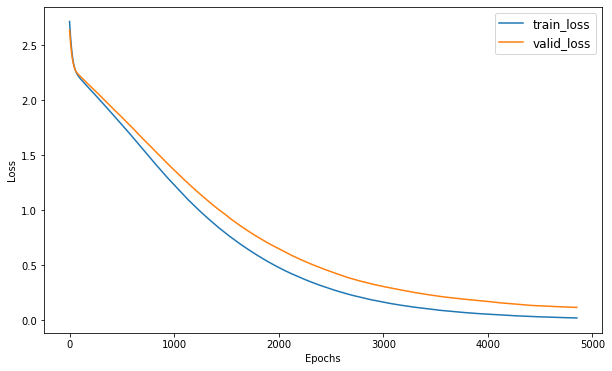

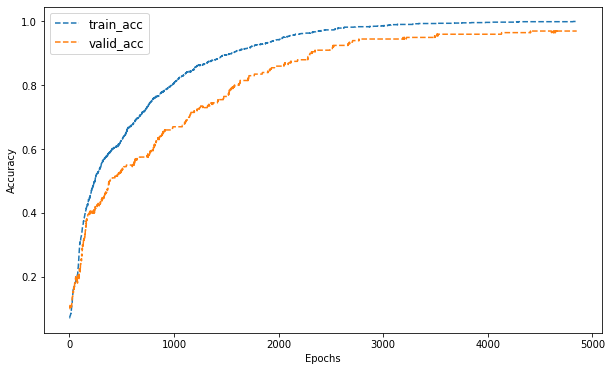

In [13]:
visualize_history(history)

# 3. Evaluate the trained model

## Here we implement the following functions:
* [evaluate_model_on_dataset](): Evaluate model on data set (training/valid/test) set.
* [evaluate_model_on_single_data](): Evaluate model on single file.
* [confusion_matrix_on_dataset](): Generate and visualize the confusion matrix on test set.

In [14]:
from Evaluation import evaluate_model_on_dataset, confusion_matrix_on_dataset, evaluate_model_on_single_data

## Test the above functions
### 1) Evaluate single data file

In [15]:
eval_dict = evaluate_model_on_single_data(model, test_ls[3], cfg.UTTERANCE_LENGTH)

print(eval_dict)

MFCC features, before reshape: (600,)
MFCC features, after reshape: (1, 600)
Shape of mfcc_feature: (1, 600)
Shape of label: (10,)
File has been evaluated: ./raw_data/8_nicolas_34.wav
Ground truth label: 8
Predicted label: 8
{'file_path': './raw_data/8_nicolas_34.wav', 'true_label': 8, 'predicted_label': 8}


### 2) Evaluate on test set

In [16]:
loss, acc = evaluate_model_on_dataset(model, test_mfcc, test_label)

print('Test loss: {}'.format(loss))
print('Test accuracy: {}'.format(acc))

400/400 [==============================] - 0s 204us/step
Test loss: 0.17355696618556976
Test accuracy: 0.955


### 3) Confusion matrix on test set

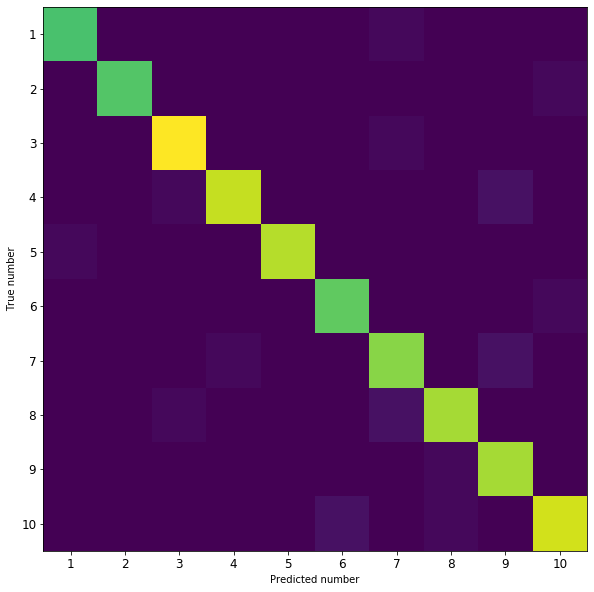

In [17]:
confusion_mat = confusion_matrix_on_dataset(model, test_mfcc, test_label)